Risk Analytics In Banking & Financial Services 1 Case Study 

The objective of this case study is to analyze patterns that signal potential difficulty
in meeting installment payments for clients. These patterns will inform decisions such as 
loan approval, loan amount adjustments, and setting interest rates, with the aim of ensuring
deserving borrowers are not overlooked. Through exploratory data analysis (EDA), the study seeks
to identify key variables driving loan defaults, empowering the company to refine its portfolio 
and assess risks effectively.

Loan Default Analysis
[Target]
0 No Default 
1 Default

#Bank needs clarity on who is non defaulter and what interest Rate to provide to client. 
#All other varibles and in review

#Cash loans         278232
#Revolving loans     29279

In [127]:
#Data imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125) 
import warnings
warnings.filterwarnings('ignore')

Load Dataset 

In [128]:
#import Risk Analytics In Banking & Financial Services 1
#Dataset has 3 csv sheets

App_csv = 'application_data.csv'
App_ = pd.read_csv('application_data.csv')
App_.head(10)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

Columns_description defines all rows.

"The Dictionary"
Row: Application required fields
Description: Definition of rows 

In [129]:
Columns_description_csv = "columns_description.csv "
Columns_description_ = pd.read_csv ('columns_description.csv')
Columns_description_.head(1)

Unnamed: 0             Table         Row               Description Special
0           1  application_data  SK_ID_CURR  ID of loan in our sample     NaN

In [130]:
display("columns_description")
Columns_description_=Columns_description_.drop(['Unnamed: 0'],axis=1)
display(Columns_description_)


'columns_description'

Table                        Row  \
0            application_data                 SK_ID_CURR   
1            application_data                     TARGET   
2            application_data         NAME_CONTRACT_TYPE   
3            application_data                CODE_GENDER   
4            application_data               FLAG_OWN_CAR   
..                        ...                        ...   
155  previous_application.csv             DAYS_FIRST_DUE   
156  previous_application.csv  DAYS_LAST_DUE_1ST_VERSION   
157  previous_application.csv              DAYS_LAST_DUE   
158  previous_application.csv           DAYS_TERMINATION   
159  previous_application.csv  NFLAG_INSURED_ON_APPROVAL   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
155  Relative to application date of current applic...   
156  Relative to application date of current applic...   
157  Relative to application date of current applic...   
158  Relative to application date of current applic...   
159  Did the client requested insurance during the ...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
155  time only relative to the application  
156  time only relative to the application  
157  time only relative to the application  
158  time only relative to the application  
159                                    NaN  

[160 rows x 4 columns]

Understand dataframe dimensions
-Number of Rows & Columns

In [131]:
App_.shape

(307511, 122)

In [132]:
Columns_description_.shape

(160, 4)

Understand Columns information 
-Advise details of all Columns 

In [133]:
App_.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [134]:
Columns_description_.dtypes

Table          object
Row            object
Description    object
Special        object
dtype: object

High level summary of all csv files 
-data includes memory,floats,columns,number of entries and etc.

In [135]:
App_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [136]:
Columns_description_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        160 non-null    object
 1   Row          160 non-null    object
 2   Description  160 non-null    object
 3   Special      69 non-null     object
dtypes: object(4)
memory usage: 5.1+ KB


Providing the basic statistical details of the data frame
-Understanding all columns with numerical info
-Data includes: mean-max-medium
info for csv App_ & Previous_App 
Note: Columns_description_csv is the data dictionary which describes the meaning of the variables.

In [70]:
App_.describe().T

count           mean            std  \
SK_ID_CURR                    307511.0  278180.518577  102790.175348   
TARGET                        307511.0       0.080729       0.272419   
CNT_CHILDREN                  307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279   
AMT_CREDIT                    307511.0  599025.999706  402490.776996   
AMT_ANNUITY                   307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831   
DAYS_BIRTH                    307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                 307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION             307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH               307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                   104582.0      12.061091      11.944812   
FLAG_MOBIL                    307511.0       0.999997       0.001803   
FLAG_EMP_PHONE                307511.0       0.819889       0.384280   
FLAG_WORK_PHONE               307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE              307511.0       0.998133       0.043164   
FLAG_PHONE                    307511.0       0.281066       0.449521   
FLAG_EMAIL                    307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682   
REGION_RATING_CLIENT          307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY   307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION    307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION    307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY        307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY        307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.179555       0.383817   
EXT_SOURCE_1                  134133.0       0.502130       0.211062   
EXT_SOURCE_2                  306851.0       0.514393       0.191060   
EXT_SOURCE_3                  246546.0       0.510853       0.194844   
APARTMENTS_AVG                151450.0       0.117440       0.108240   
BASEMENTAREA_AVG              127568.0       0.088442       0.082438   
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.977735       0.059223   
YEARS_BUILD_AVG               103023.0       0.752471       0.113280   
COMMONAREA_AVG                 92646.0       0.044621       0.076036   
ELEVATORS_AVG                 143620.0       0.078942       0.134576   
ENTRANCES_AVG                 152683.0       0.149725       0.100049   
FLOORSMAX_AVG                 154491.0       0.226282       0.144641   
FLOORSMIN_AVG                  98869.0       0.231894       0.161380   
LANDAREA_AVG                  124921.0       0.066333       0.081184   
LIVINGAPARTMENTS_AVG           97312.0       0.100775       0.092576   
LIVINGAREA_AVG                153161.0       0.107399       0.110565   
NONLIVINGAPARTMENTS_AVG        93997.0       0.008809       0.047732   
NONLIVINGAREA_AVG             137829.0       0.028358       0.069523   
APARTMENTS_MODE               151450.0       0.114231       0.107936   
BASEMENTAREA_MODE             127568.0       0.087543       0.084307   
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.977065       0.064575   
YEARS_BUILD_MODE              103023.0       0.759637       0.110111   
COMMONAREA_MODE                92646.0       0.042553       0.074445   
ELEVATORS_MODE                143620.0       0.074490       0.132256   
ENTRANCES_MODE                152683.0       0.145193       0.100977   
FLOORSMAX_MODE                154491.0       0.222315       0.143709   
FLOORSMIN_MODE                 98869.0       0.228058       0.161160   
L

Data quality Check and reivew missing values
-Is data good to read
-Check for null values 

In [71]:
cols = pd.DataFrame(App_.isnull().mean().round(4) * 100, columns=['percentage_missing_values']).sort_values(by=['percentage_missing_values'])
print(cols)

                              percentage_missing_values
SK_ID_CURR                                         0.00
HOUR_APPR_PROCESS_START                            0.00
REG_REGION_NOT_WORK_REGION                         0.00
LIVE_REGION_NOT_WORK_REGION                        0.00
REG_CITY_NOT_LIVE_CITY                             0.00
REG_CITY_NOT_WORK_CITY                             0.00
LIVE_CITY_NOT_WORK_CITY                            0.00
ORGANIZATION_TYPE                                  0.00
FLAG_DOCUMENT_21                                   0.00
FLAG_DOCUMENT_20                                   0.00
FLAG_DOCUMENT_19                                   0.00
FLAG_DOCUMENT_18                                   0.00
FLAG_DOCUMENT_17                                   0.00
FLAG_DOCUMENT_16                                   0.00
WEEKDAY_APPR_PROCESS_START                         0.00
FLAG_DOCUMENT_15                                   0.00
FLAG_DOCUMENT_13                                

Next steps, cleaning the missing/null value.
    Null value range start from 0.21 to 69.87

50% or more missing values is not good for testing.

In [72]:
print(str(round(100.00 * sum(cols['percentage_missing_values'] == 0) / len(cols), 2)) + "% columns have no missing value")
print(str(round(100.00 * sum((cols['percentage_missing_values'] > 0) & (cols['percentage_missing_values'] <= 10)) / len(cols), 2)) + "% columns have missing values between 0-10%")
print(str(round(100.00 * sum((cols['percentage_missing_values'] > 10) & (cols['percentage_missing_values'] <= 50)) / len(cols), 2)) + "% columns have missing values between 10-50%")
print(str(round(100.00 * sum(cols['percentage_missing_values'] > 50) / len(cols), 2)) + "% columns have more than 50% missing value")

47.54% columns have no missing value
5.74% columns have missing values between 0-10%
13.11% columns have missing values between 10-50%
33.61% columns have more than 50% missing value


In [73]:
#count the number of null values in rows for data App_

In [74]:
row_null_counts = pd.DataFrame(App_.isnull().sum(axis=1), columns=['num_missing_value'])
row_null_counts

num_missing_value
0                       1
1                       2
2                      48
3                      56
4                      50
...                   ...
307506                  8
307507                 10
307508                  4
307509                 30
307510                 17

[307511 rows x 1 columns]

Remove Columns with high percentage of missing values (>50%)

In [76]:
App_ = App_.drop(columns=App_.columns[App_.apply(lambda col: (col.isnull().sum() / len(App_) * 100) > 50)], axis=1)
print(App_.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

Count how many columns remain after dropping data with 50% of missing value

In [77]:
#previous count (307511, 122)
App_.shape

(307511, 81)

Feature selections 

Checking columns 'FLAG' on csv file 'application_data'

In [78]:
flag_col = []

for col in App_.columns:
    if col.startswith("FLAG_"):
        flag_col.append(col)
        
flag_col

#print("Columns starting with 'FLAG_':", flag_col)

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [79]:
len(flag_col)

28

In [80]:
App_.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [81]:
#set 'FLAG' in a seperate data frame

flag_target_col = App_[flag_col+['TARGET']]
flag_target_col.head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TARGET  
0                 0                 0       1  
1                 0                 0       0  
2                 0                 0       0  
3                 0                 0       0  
4                 0                 0       0

Reviewing target coloumns for 'FLAG_', show data [0],  Customers who are non default and did not require documents.


In [82]:
plt.figure(figsize=(20,25))

for i, col in enumerate(flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_target_col,x=col,hue='TARGET')

In [83]:
#show correllation of items related in 1st half charts and documents will review later.

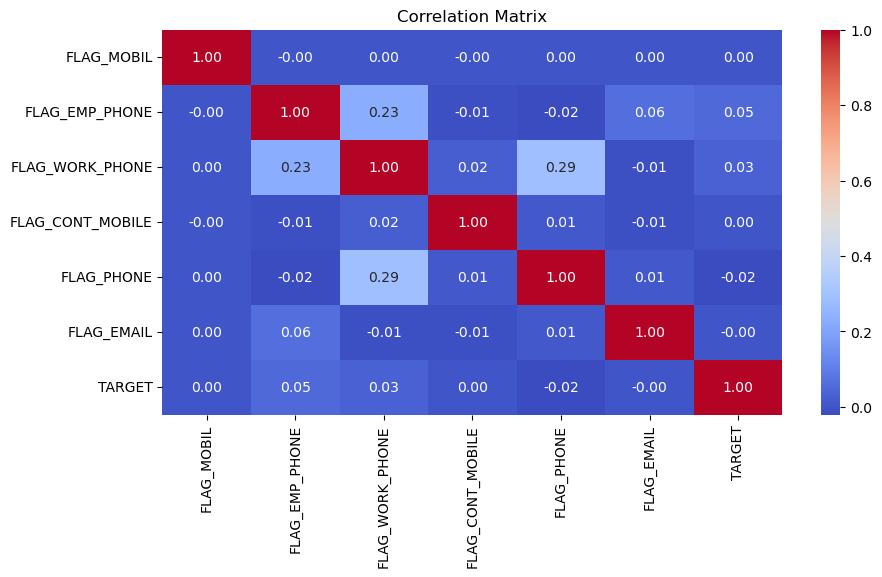

In [84]:
# Define the columns to be included in the correlation analysis
flag_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 
'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']

# Filter out [NAN] non-numeric columns  
numeric_columns = [col for col in flag_corr if App_[col].dtype in ['int64', 'float64']]

# Selecting the specified numeric columns
flag_corr_numeric = App_[numeric_columns]

# Displaying the correlation matrix for the DataFrame flag_corr_numeric
corr_df = round(flag_corr_numeric.corr(), 2)

plt.figure(figsize=(10, 5))
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [85]:
#Count the [NAN] values from colomns FLAG_OWN_REALTY and FLAG_OWN_CAR. These are Yes or No data.

In [86]:
flag_target_col.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [87]:
flag_target_col.groupby(['FLAG_OWN_REALTY']).size()

FLAG_OWN_REALTY
N     94199
Y    213312
dtype: int64

Replace Yes and No to [N=0] / [Y=1] 
NOTE: Both coloumns were unable to plot on heatmap

In [88]:
flag_target_col['FLAG_OWN_CAR'] = flag_target_col['FLAG_OWN_CAR'].replace({'N':0, 'Y':1})
flag_target_col['FLAG_OWN_REALTY'] = flag_target_col['FLAG_OWN_REALTY'].replace({'N':0, 'Y':1})

#check for the change 
flag_target_col.groupby(['FLAG_OWN_REALTY']).size()

FLAG_OWN_REALTY
0     94199
1    213312
dtype: int64

<Axes: >

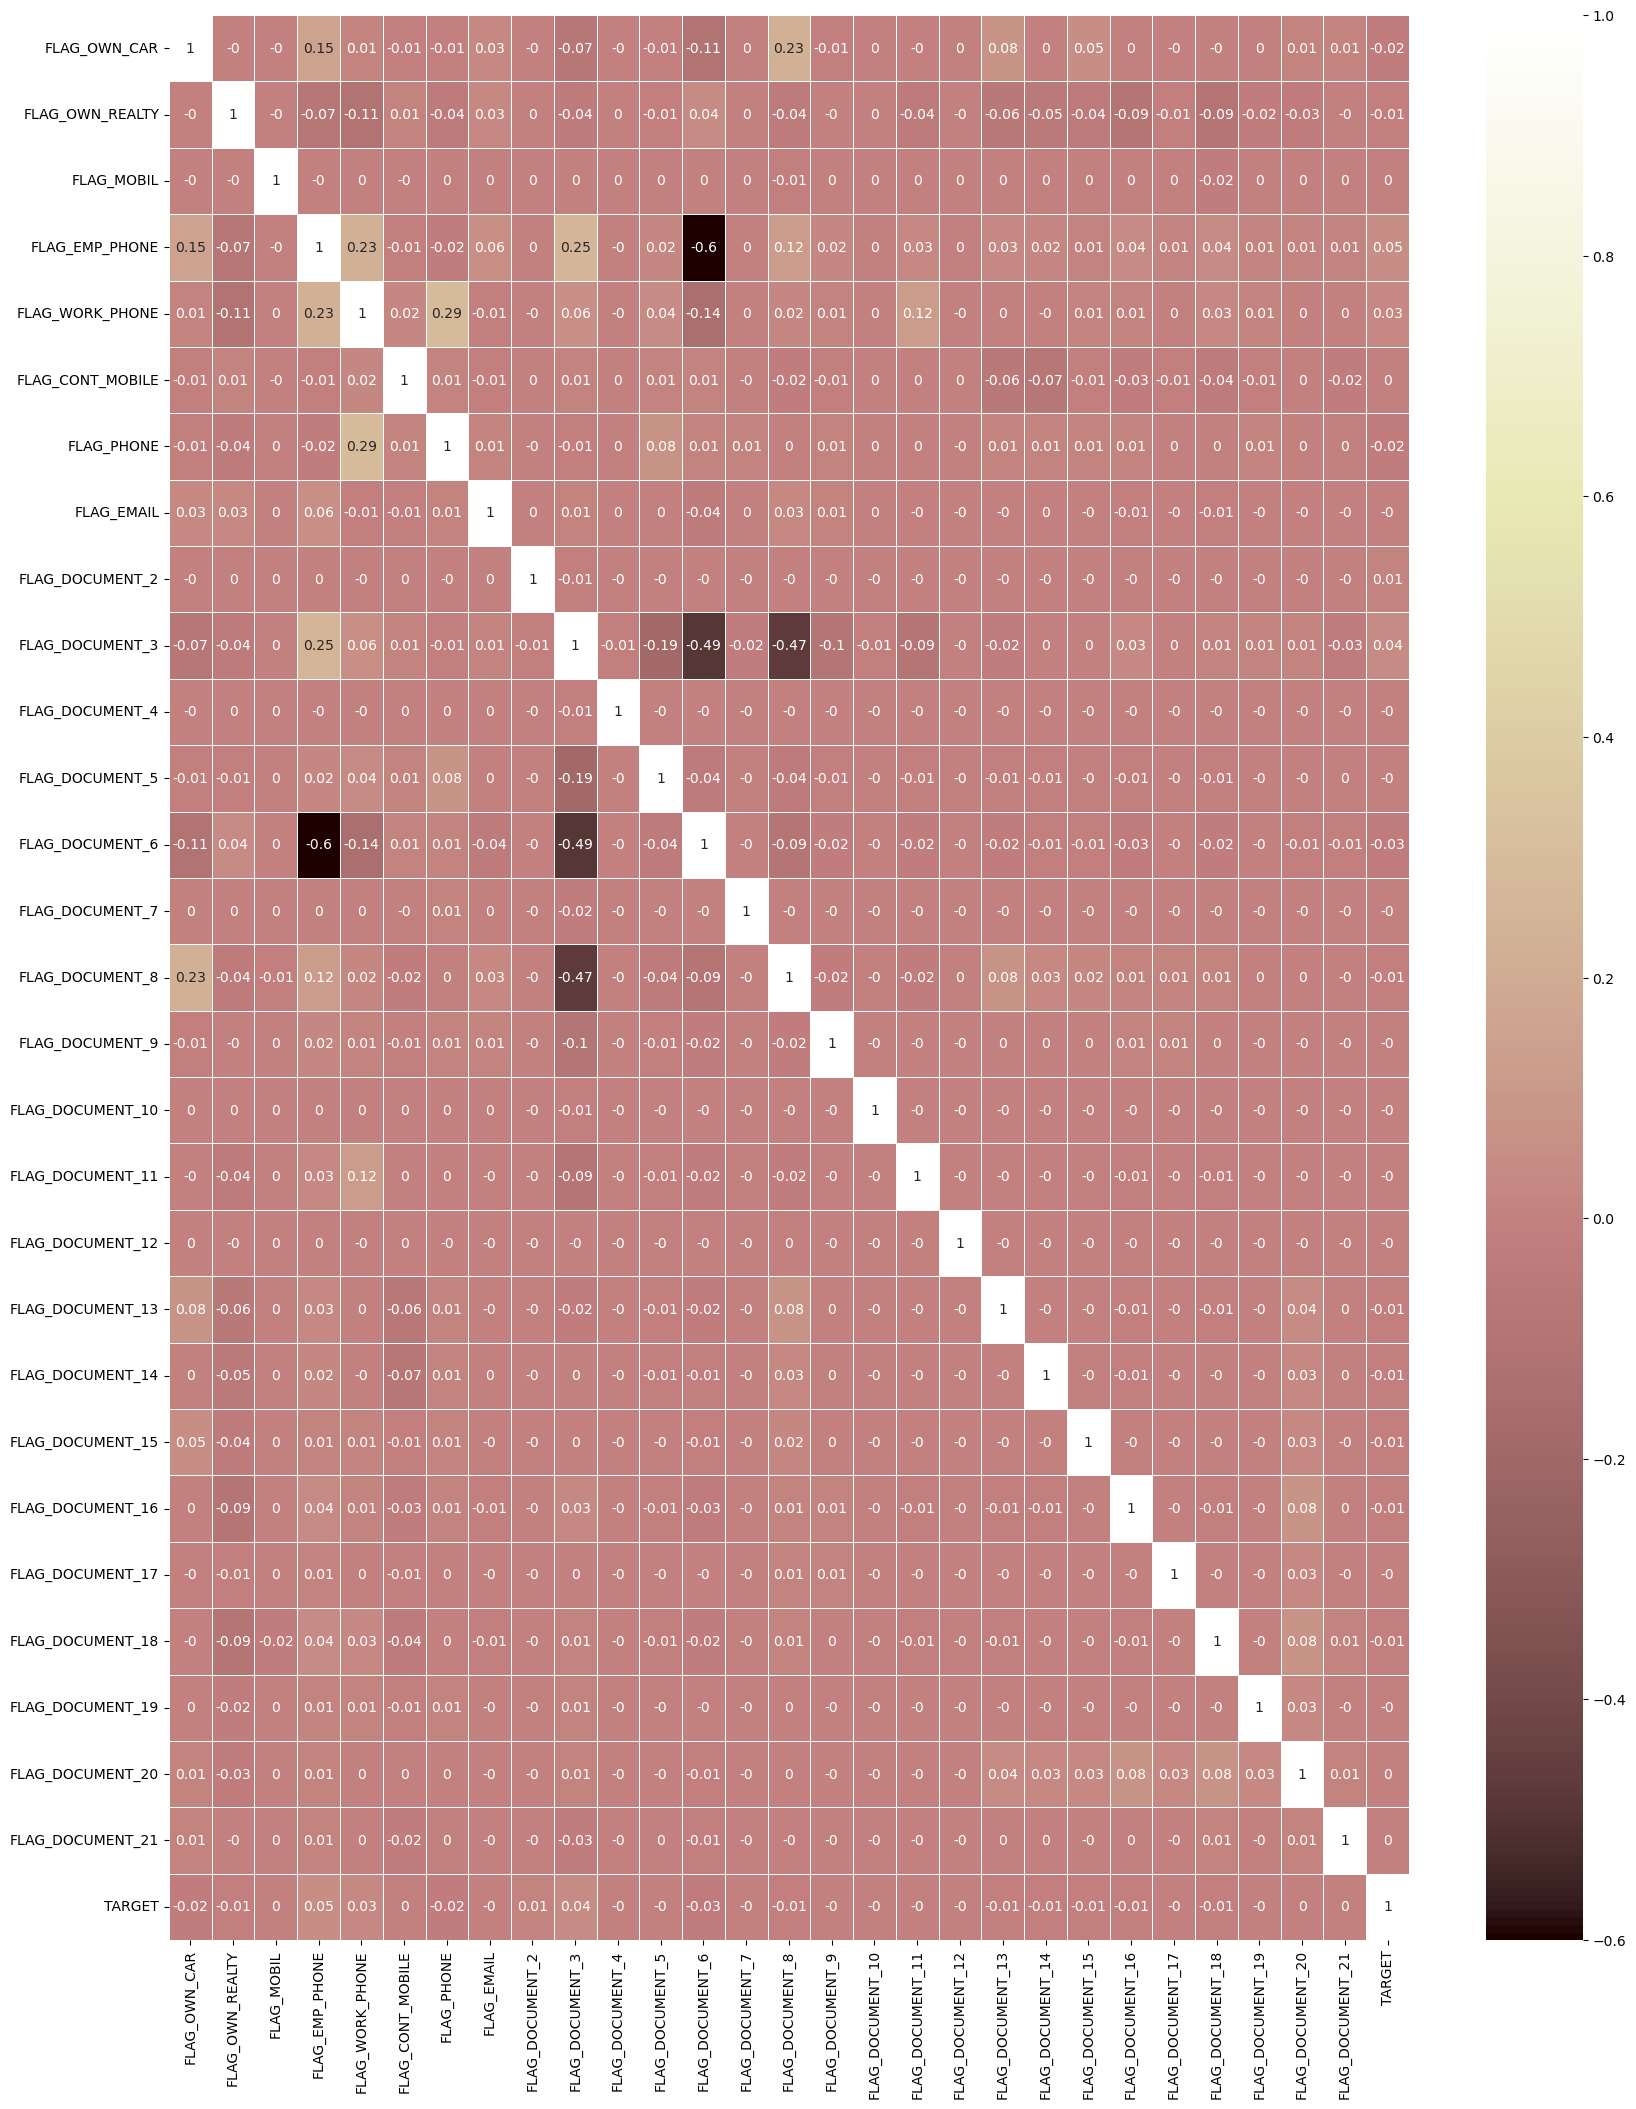

In [89]:
#displaby heatmap with nan values updated to 1 and 0

corr_df = round(flag_target_col.corr(),2)

plt.figure(figsize=(20, 25))
sns.heatmap(corr_df,cmap='pink',linewidths=.5,annot=True)

In [90]:
# Define the columns to be included in the correlation analysis 'Documents'
flag_corr = [
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21','TARGET']

# Filter out [NAN] non-numeric columns  
numeric_columns = [col for col in flag_corr if App_[col].dtype in ['int64', 'float64']]

# Selecting the specified numeric columns
flag_corr_numeric = App_[numeric_columns]

# Displaying the correlation matrix for the DataFrame flag_corr_numeric
corr_df = round(flag_corr_numeric.corr(), 2)

plt.figure(figsize=(20, 25))
sns.heatmap(corr_df, cmap='pink', annot=True, fmt=".2f")
plt.title('Correlation for FLAG DOCUMENT')
plt.show()

The above heatmap shows no correlation to TARGET. Dropping all 'FLAG' columns because no data is close to 1.

In [91]:
App_flag_removed = App_.drop(labels= flag_col, axis=1)

# Check the shape after removing the specified columns FLAG
print(App_flag_removed.shape)

(307511, 53)


In [92]:

#check remaining coloumns in App_ file 
App_flag_removed.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120        Laborers              1.0   
1            -1186.0             -291      Core staff              2.0   
2            -4260.0            -2531        Laborers              1.0   
3            -9833.0            -2437        Laborers              2.0   
4            -4311.0            -3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3               

In [93]:
round(App_flag_removed[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr(),2)


EXT_SOURCE_2  EXT_SOURCE_3  TARGET
EXT_SOURCE_2          1.00          0.11   -0.16
EXT_SOURCE_3          0.11          1.00   -0.18
TARGET               -0.16         -0.18    1.00

In [102]:
plt.figure(figsize=(5, 2))
sns.heatmap(data=round(App_flag_removed[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr(), 2),
            cmap='viridis',
            linewidths=0.5,
            annot=True)
plt.show()

In [103]:
#no data relation to TARGET COL per define statement 
#Drop EXT_Source col/Define:Normalized score from external data source 

In [104]:
App_score_col_removed = App_flag_removed.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)

# Check the shape after removing the specified columns FLAG
print(App_score_col_removed.shape)

(307511, 51)


Checking next target columns 'AMT' on csv file 'application_data'
    AMT_REQ_CREDIT_BUREAU_HOUR                        13.50
    AMT_REQ_CREDIT_BUREAU_MON                         13.50
    AMT_REQ_CREDIT_BUREAU_WEEK                        13.50
    AMT_REQ_CREDIT_BUREAU_DAY                         13.50
    AMT_REQ_CREDIT_BUREAU_YEAR                        13.50
    AMT_REQ_CREDIT_BUREAU_QRT                         13.50



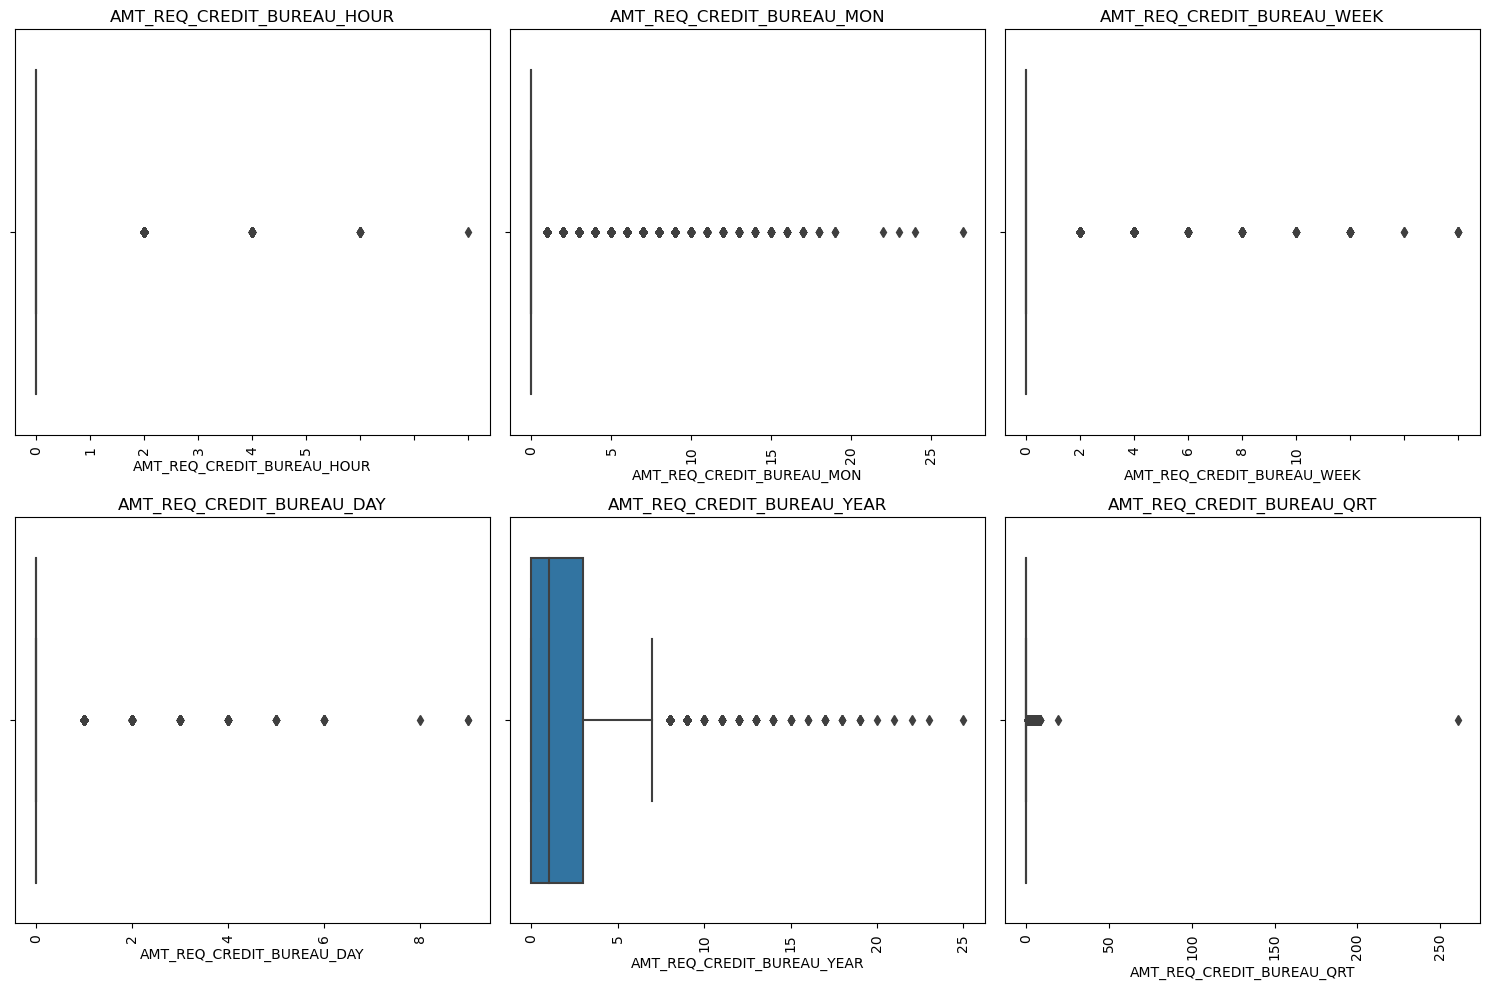

In [105]:
# Create boxplot for target columns with null values at 13%

columns = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  #grid of subplots

for i, col in enumerate(columns):  # review all columns
    sns.boxplot(x=App_[col], ax=axes[i//3, i%3])  # Plot data in separate subplot
    axes[i//3, i%3].set_title(col)  # title
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=90)  # Rotate x-axis labels 

plt.tight_layout()  #prevent overlapping
plt.show()

Above BOX PLOT is a clear visual of outliers. 
Below is a percentage/count to understand the boxplot.

In [106]:
columns = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT']

for col in columns:
    print(f"Value counts for {col}:")
    print(App_[col].value_counts())
    print()

Value counts for AMT_REQ_CREDIT_BUREAU_HOUR:
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

Value counts for AMT_REQ_CREDIT_BUREAU_MON:
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

Value counts for AMT_REQ_CREDIT_BUREAU_WEEK:
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

Value counts for AMT_REQ_CREDIT_BUREAU_DAY:
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0        

In [107]:
round(App_flag_removed[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','TARGET']].corr(),2)

AMT_REQ_CREDIT_BUREAU_HOUR  \
AMT_REQ_CREDIT_BUREAU_HOUR                        1.00   
AMT_REQ_CREDIT_BUREAU_MON                        -0.00   
AMT_REQ_CREDIT_BUREAU_WEEK                        0.00   
AMT_REQ_CREDIT_BUREAU_DAY                         0.23   
AMT_REQ_CREDIT_BUREAU_YEAR                       -0.00   
AMT_REQ_CREDIT_BUREAU_QRT                        -0.00   
TARGET                                            0.00   

                            AMT_REQ_CREDIT_BUREAU_MON  \
AMT_REQ_CREDIT_BUREAU_HOUR                      -0.00   
AMT_REQ_CREDIT_BUREAU_MON                        1.00   
AMT_REQ_CREDIT_BUREAU_WEEK                      -0.01   
AMT_REQ_CREDIT_BUREAU_DAY                       -0.01   
AMT_REQ_CREDIT_BUREAU_YEAR                      -0.00   
AMT_REQ_CREDIT_BUREAU_QRT                       -0.01   
TARGET                                          -0.01   

                            AMT_REQ_CREDIT_BUREAU_WEEK  \
AMT_REQ_CREDIT_BUREAU_HOUR                        0.00   
AMT_REQ_CREDIT_BUREAU_MON                        -0.01   
AMT_REQ_CREDIT_BUREAU_WEEK                        1.00   
AMT_REQ_CREDIT_BUREAU_DAY                         0.22   
AMT_REQ_CREDIT_BUREAU_YEAR                        0.02   
AMT_REQ_CREDIT_BUREAU_QRT                        -0.02   
TARGET                                            0.00   

                            AMT_REQ_CREDIT_BUREAU_DAY  \
AMT_REQ_CREDIT_BUREAU_HOUR                       0.23   
AMT_REQ_CREDIT_BUREAU_MON                       -0.01   
AMT_REQ_CREDIT_BUREAU_WEEK                       0.22   
AMT_REQ_CREDIT_BUREAU_DAY                        1.00   
AMT_REQ_CREDIT_BUREAU_YEAR                      -0.00   
AMT_REQ_CREDIT_BUREAU_QRT                       -0.00   
TARGET                                           0.00   

                            AMT_REQ_CREDIT_BUREAU_YEAR  \
AMT_REQ_CREDIT_BUREAU_HOUR                       -0.00   
AMT_REQ_CREDIT_BUREAU_MON                        -0.00   
AMT_REQ_CREDIT_BUREAU_WEEK                        0.02   
AMT_REQ_CREDIT_BUREAU_DAY                        -0.00   
AMT_REQ_CREDIT_BUREAU_YEAR                        1.00   
AMT_REQ_CREDIT_BUREAU_QRT                         0.08   
TARGET                                            0.02   

                            AMT_REQ_CREDIT_BUREAU_QRT  TARGET  
AMT_REQ_CREDIT_BUREAU_HOUR                      -0.00    0.00  
AMT_REQ_CREDIT_BUREAU_MON                       -0.01   -0.01  
AMT_REQ_CREDIT_BUREAU_WEEK                      -0.02    0.00  
AMT_REQ_CREDIT_BUREAU_DAY                       -0.00    0.00  
AMT_REQ_CREDIT_BUREAU_YEAR                       0.08    0.02  
AMT_REQ_CREDIT_BUREAU_QRT                        1.00   -0.00  
TARGET                                          -0.00    1.00

Address imputation and modify 

In [108]:
#Current coloumns: App_ 'Application.csv'

In [109]:
App_score_col_removed.isnull().sum().sort_values()

SK_ID_CURR                           0
ORGANIZATION_TYPE                    0
LIVE_CITY_NOT_WORK_CITY              0
REG_CITY_NOT_WORK_CITY               0
REG_CITY_NOT_LIVE_CITY               0
LIVE_REGION_NOT_WORK_REGION          0
REG_REGION_NOT_WORK_REGION           0
HOUR_APPR_PROCESS_START              0
WEEKDAY_APPR_PROCESS_START           0
REGION_RATING_CLIENT_W_CITY          0
REGION_RATING_CLIENT                 0
DAYS_ID_PUBLISH                      0
DAYS_REGISTRATION                    0
DAYS_EMPLOYED                        0
DAYS_BIRTH                           0
REG_REGION_NOT_LIVE_REGION           0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
CNT_CHILDREN                         0
AMT_CREDIT                           0
AMT_INCOME_TOTAL                     0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE      

In [110]:
#Get the percentage of remaining missing values 
App_score_col_removed.isnull().sum().sort_values()/App_score_col_removed.shape[0]

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
AMT_CREDIT                      0.000000
AMT_INCOME_TOTAL                0.000000
NAME_INCOME_TYPE

In [111]:
#Start addressing missing data. 

In [112]:
App_score_col_removed.groupby('DAYS_LAST_PHONE_CHANGE').size()

DAYS_LAST_PHONE_CHANGE
-4292.0        1
-4185.0        1
-4173.0        1
-4153.0        1
-4131.0        1
           ...  
-4.0        1285
-3.0        1763
-2.0        2318
-1.0        2812
 0.0       37672
Length: 3773, dtype: int64

In [113]:
App_score_col_removed['DAYS_LAST_PHONE_CHANGE'].mode()

0    0.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [114]:
mode_value = App_score_col_removed['DAYS_LAST_PHONE_CHANGE'].mode()[0]
App_score_col_removed['DAYS_LAST_PHONE_CHANGE'].fillna(mode_value, inplace=True)

In [115]:
#fill in missing value 1

In [116]:
App_score_col_removed['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [117]:
App_score_col_removed.groupby('CNT_FAM_MEMBERS').size()

CNT_FAM_MEMBERS
1.0      67847
2.0     158357
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
dtype: int64

In [118]:
App_score_col_removed['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [119]:
mode_value = App_score_col_removed['CNT_FAM_MEMBERS'].mode()[0]
App_score_col_removed['CNT_FAM_MEMBERS'].fillna(mode_value, inplace=True)

In [120]:
#fill in missing values 2

In [121]:
App_score_col_removed['CNT_FAM_MEMBERS'].isnull().sum()

0

In [122]:
App_score_col_removed.groupby('AMT_ANNUITY').size()

#Define:A loan annuity is a fixed monthly payment comprising both 
    #principal and interest, designed to fully repay the loan over a specified term.


AMT_ANNUITY
1615.5       1
1980.0       2
1993.5       1
2052.0       1
2164.5       2
            ..
216589.5     1
220297.5     1
225000.0    23
230161.5     1
258025.5     1
Length: 13672, dtype: int64

In [ ]:
App_score_col_removed.groupby('AMT_ANNUITY').describe()

In [ ]:
#replave missing values with mean

In [ ]:
mean_value = App_score_col_removed['AMT_ANNUITY'].mean()  # Calculate the mean
App_score_col_removed['AMT_ANNUITY'].fillna(mean_value, inplace=True)  # Fill missing values with the mean

In [ ]:
#fill in missing values 12

In [69]:
App_score_col_removed['AMT_ANNUITY'].isnull().sum()

0

In [70]:
App_score_col_removed.groupby('AMT_GOODS_PRICE').size().sort_values()

AMT_GOODS_PRICE
40500.0          1
584820.0         1
584842.5         1
1259563.5        1
585616.5         1
             ...  
270000.0     11428
900000.0     15416
675000.0     24962
225000.0     25282
450000.0     26022
Length: 1002, dtype: int64

In [71]:
App_score_col_removed['AMT_GOODS_PRICE'].mode()

0    450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [72]:
mode_value = App_score_col_removed['AMT_GOODS_PRICE'].mode()[0]
App_score_col_removed['AMT_GOODS_PRICE'].fillna(mode_value, inplace=True)

In [73]:
App_score_col_removed['AMT_GOODS_PRICE'].isnull().sum()

0

In [74]:
#Define DEF/OBS_30/60_CNT_SOCIAL_CIRCLE  How many observation of client's social surroundings with observable (NUMBER'30') DPD (days past due) default

Fields for Social Circle 
null count(same)
DEF_30_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021

In [75]:
App_score_col_removed.groupby(['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE']).size().sort_values()

DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE
34.0                      24.0                      344.0                     348.0                            1
1.0                       1.0                       22.0                      23.0                             1
                                                    23.0                      24.0                             1
4.0                       1.0                       10.0                      10.0                             1
2.0                       0.0                       2.0                       3.0                              1
                                                                                                           ...  
0.0                       0.0                       4.0                       4.0                           9864
                                                    3.0                       3.0                         

In [76]:
App_score_col_removed[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE']].mode()

DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  
0                       0.0                       0.0

In [77]:
App_score_col_removed['DEF_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [78]:
App_score_col_removed['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [79]:
App_score_col_removed['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [80]:
#replace each row with missing values of 1021

In [81]:
mode_value = App_score_col_removed['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]
App_score_col_removed['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(mode_value, inplace=True)

In [82]:
mode_value = App_score_col_removed['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]
App_score_col_removed['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(mode_value, inplace=True)

In [83]:
mode_value = App_score_col_removed['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0]
App_score_col_removed['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(mode_value, inplace=True)

In [84]:
mode_value = App_score_col_removed['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0]
App_score_col_removed['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(mode_value, inplace=True)

In [85]:
App_score_col_removed[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE']].isnull().sum()

DEF_30_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
OBS_30_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [86]:
#Define NAME_TYPE_SUITE: Who accompanied client when applying for the previous application
# percentage 0.004201 of null count

In [87]:
App_score_col_removed.groupby('NAME_TYPE_SUITE').size().sort_values()

NAME_TYPE_SUITE
Group of people       271
Other_A               866
Other_B              1770
Children             3267
Spouse, partner     11370
Family              40149
Unaccompanied      248526
dtype: int64

In [88]:
App_score_col_removed['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [89]:
#Running mode for coloumn NAME TYPE SUITE, we calculate to fill missling value with Unaccompanied

In [90]:
App_score_col_removed['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [91]:
mode_value = App_score_col_removed['NAME_TYPE_SUITE'].mode()[0]
App_score_col_removed['NAME_TYPE_SUITE'].fillna(mode_value, inplace=True)

In [92]:
App_score_col_removed['NAME_TYPE_SUITE'].isnull().sum()

0

Fields for AMT REQ

AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519

Definitions: in order by above list

Number of enquiries to Credit Bureau about the client one hour before application	
Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)	
Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)	
Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)	
Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)	
Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)	


In [93]:
App_score_col_removed[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','TARGET']].sum()

AMT_REQ_CREDIT_BUREAU_HOUR      1703.0
AMT_REQ_CREDIT_BUREAU_MON      71125.0
AMT_REQ_CREDIT_BUREAU_WEEK      9140.0
AMT_REQ_CREDIT_BUREAU_DAY       1862.0
AMT_REQ_CREDIT_BUREAU_YEAR    505378.0
AMT_REQ_CREDIT_BUREAU_QRT      70614.0
TARGET                         24825.0
dtype: float64

In [94]:
#Confirming AMT COLOUMNS have same null count (41519)

In [95]:
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [96]:
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_HOUR'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [97]:
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_DAY'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [98]:
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_DAY'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [99]:
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_QRT'].unique()

array([  0.,  nan,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,
        19.])

In [100]:
mode_value = App_score_col_removed['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0]
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(mode_value, inplace=True)

In [101]:
mode_value = App_score_col_removed['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_MON'].fillna(mode_value, inplace=True)

In [102]:
mode_value = App_score_col_removed['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0]
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(mode_value, inplace=True)

In [103]:
mode_value = App_score_col_removed['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(mode_value, inplace=True)

In [104]:
mode_value = App_score_col_removed['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(mode_value, inplace=True)

In [105]:
mode_value = App_score_col_removed['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]
App_score_col_removed['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(mode_value, inplace=True)

In [106]:
App_score_col_removed[['AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_QRT']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
dtype: int64

In [107]:
#create a group list for AMT

amt_req_col = []

for col in App_score_col_removed.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)
        
amt_req_col
        

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [108]:
#column check for values 

App_score_col_removed.isnull().sum().sort_values()

SK_ID_CURR                           0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
AMT_REQ_CREDIT_BUREAU_QRT            0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
REGION_RATING_CLIENT_W_CITY          0
ORGANIZATION_TYPE                    0
DEF_30_CNT_SOCIAL_CIRCLE             0
OBS_60_CNT_SOCIAL_CIRCLE             0
DEF_60_CNT_SOCIAL_CIRCLE             0
DAYS_LAST_PHONE_CHANGE               0
AMT_REQ_CREDIT_BUREAU_HOUR           0
AMT_REQ_CREDIT_BUREAU_DAY            0
AMT_REQ_CREDIT_BUREAU_WEEK           0
AMT_REQ_CREDIT_BUREAU_MON            0
OBS_30_CNT_SOCIAL_CIRCLE             0
REGION_RATING_CLIENT                 0
REG_REGION_NOT_LIVE_REGION           0
AMT_REQ_CREDIT_BUREAU_YEAR           0
AMT_ANNUITY                          0
AMT_CREDIT                           0
AMT_INCOME_TOTAL         

In [109]:
#Addressing missing data, CONTINUE...

In [110]:
#278 missing values
App_score_col_removed['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [111]:
#MAX IS THE OUTLIER

In [112]:
App_score_col_removed['AMT_GOODS_PRICE'].unique()

array([ 351000. , 1129500. ,  135000. , ...,  453465. ,  143977.5,
        743863.5])

In [113]:
App_score_col_removed['AMT_GOODS_PRICE'].mode()

#Define: For consumer loans it is the price of the goods/produch for which the loan is given

0    450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [114]:
App_score_col_removed['AMT_GOODS_PRICE'] = App_score_col_removed['AMT_GOODS_PRICE'].fillna((App_score_col_removed['AMT_GOODS_PRICE'].median()))

In [115]:
App_score_col_removed['AMT_GOODS_PRICE'].isnull().sum()

0

SOCIAL_CIRCLE Review:

OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021

Observation DATA 
Define SOCIAL_CIRCLE : analyzing the social environment or context in which the client lives or operates, and how it relates to the occurrence of observable 30/60 DPD defaults. In simpler terms, it means observing or studying the social factors or conditions around clients and how these factors might influence the likelihood of a 30-day past due default on loans.
    Note:OBS How many observation of client's social surroundings with observable 30/60 DPD (days past due) default

In [116]:
App_score_col_removed.groupby('OBS_30_CNT_SOCIAL_CIRCLE').size().sort_values()

OBS_30_CNT_SOCIAL_CIRCLE
348.0         1
29.0          1
28.0          1
47.0          1
30.0          2
26.0          3
27.0          5
25.0         11
24.0         11
23.0         15
22.0         22
21.0         29
20.0         30
19.0         44
18.0         46
17.0         88
16.0        133
15.0        166
14.0        258
13.0        411
12.0        652
11.0        852
10.0       1376
9.0        2003
8.0        2967
7.0        4390
6.0        6453
5.0        9553
4.0       14143
3.0       20322
2.0       29808
1.0       48783
0.0      164931
dtype: int64

In [117]:
App_score_col_removed['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,   7.,   3.,   6.,   5.,  12.,
         9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,  19.,
        18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,  30.])

In [118]:
App_score_col_removed['OBS_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [119]:
App_score_col_removed['DEF_60_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1.,  3.,  5.,  4.,  7., 24.,  6.])

In [120]:
App_score_col_removed.groupby('DEF_60_CNT_SOCIAL_CIRCLE').size().sort_values()

DEF_60_CNT_SOCIAL_CIRCLE
7.0          1
24.0         1
6.0          3
5.0         20
4.0        135
3.0        598
2.0       3170
1.0      21841
0.0     281742
dtype: int64

In [121]:
App_score_col_removed.groupby('OBS_60_CNT_SOCIAL_CIRCLE').describe()

SK_ID_CURR                                          \
                              count           mean            std       min   
OBS_60_CNT_SOCIAL_CIRCLE                                                      
0.0                        165687.0  278378.450760  102772.640846  100004.0   
1.0                         48870.0  278635.014017  102854.212543  100003.0   
2.0                         29766.0  277123.596587  102731.917673  100002.0   
3.0                         20215.0  276993.379075  102789.760720  100094.0   
4.0                         13946.0  277863.484081  102784.083897  100021.0   
5.0                          9463.0  278223.966501  102975.803594  100121.0   
6.0                          6349.0  279320.763742  103849.376828  100097.0   
7.0                          4344.0  278492.298112  101598.247551  100085.0   
8.0                          2886.0  277435.776854  102448.031297  100022.0   
9.0                          1959.0  276606.358346  103200.622353  100144.0   
10.0                         1335.0  277643.375281  103127.849872  100031.0   
11.0                          837.0  276522.345281  103502.474209  100595.0   
12.0                          620.0  282705.391935   99874.483477  100137.0   
13.0                          401.0  284736.241895  103284.712047  100383.0   
14.0                          238.0  273204.105042  102535.462528  100647.0   
15.0                          166.0  269140.530120   98363.400591  101825.0   
16.0                          137.0  271634.722628  103672.364783  105924.0   
17.0                           73.0  285846.657534  100090.702756  109375.0   
18.0                           49.0  304183.346939   93177.420219  116160.0   
19.0                           44.0  257931.295455  102622.881859  110847.0   
20.0                           30.0  284632.633333  105546.504804  106174.0   
21.0                           28.0  259752.357143  103888.833479  101637.0   
22.0                           20.0  274412.800000  109683.204909  103508.0   
23.0                           13.0  301789.000000   94522.928024  137399.0   
24.0                           12.0  343984.750000  103774.648602  134892.0   
25.0                           11.0  282649.545455  111296.346656  108331.0   
26.0                            1.0  435815.000000            NaN  435815.0   
27.0                            5.0  215729.800000   27963.077222  178967.0   
28.0                            1.0  138785.000000            NaN  138785.0   
29.0                            2.0  295102.000000  183868.976312  165087.0   
30.0                            1.0  296470.000000            NaN  296470.0   
47.0                            1.0  189856.000000            NaN  189856.0   
344.0                           1.0  272071.000000            NaN  272071.0   

                                                                      TARGET  \
                                25%       50%        75%       max     count   
OBS_60_CNT_SOCIAL_CIRCLE                                                       
0.0                       189612.00  278474.0  367193.50  456255.0  165687.0   
1.0                       188998.50  279254.5  367957.50  456233.0   48870.0   
2.0                       188097.50  276754.5  365690.50  456245.0   29766.0   
3.0                       188095.50  276040.0  366614.50  456219.0   20215.0   
4.0                       188650.25  278015.0  366667.50  456243.0   13946.0   
5.0                       188612.50  277482.0  368251.00  456190.0    9463.0   
6.0                       187599.00  279924.0  369294.00  456253.0    6349.0   
7.0                       191117.50  280067.0  364354.25  456128.0    4344.0   
8.0                       188340.25  279858.5  365401.50  456072.0    2886.0   
9.0                       186631.50  277072.0  366910.50  456247.0    1959.0   
10.0                      188252.00  276965.0  366678.50  455970.0    1335.0   
11.0                      190936.00  271691.0  367497.00  45

In [122]:
App_score_col_removed['OBS_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [123]:
#DataFrame.
#The value 0.0 indicates that, for the specific observation or entry corresponding to all rows, 
#the count of observations in the social surroundings of the client within the last 30/60 days is zero.
        #inpute data to 0
mode_value = App_score_col_removed['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0]
App_score_col_removed['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(mode_value, inplace=True)
mode_value = App_score_col_removed['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0]
App_score_col_removed['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(mode_value, inplace=True)
mode_value = App_score_col_removed['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]
App_score_col_removed['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(mode_value, inplace=True)
mode_value = App_score_col_removed['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]
App_score_col_removed['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(mode_value, inplace=True)

In [124]:
App_score_col_removed[['OBS_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [125]:
App_score_col_removed['OCCUPATION_TYPE'].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [126]:
App_score_col_removed['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [127]:
#replace missing values[96391] with 0
mode_value = App_score_col_removed['OCCUPATION_TYPE'].mode()[0]
App_score_col_removed['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)

In [128]:
App_score_col_removed['OCCUPATION_TYPE'].isnull().sum()

0

ROWS:EMERGENCYSTATE_MODE, TOTALAREA_MODE 
Data will not be used for testing!
Define:Define:Normalized information about buildings where 
the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, 

In [129]:
# Data EMERGENCYSTATE_MODE, TOTALAREA_MOD W/TARGET
categories = ['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'TARGET']
values = [10, 20, 30]  # These values are just placeholders, replace them with your actual data

# Calculate percentages
total = sum(values)
percentages = [(value / total) * 100 for value in values]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(categories, values, color=['pink', 'green', 'red'])

# Show bars with percentages
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', 
             va='center', ha='left', fontsize=10)

plt.xlabel('Values')
plt.title('EMERGENCYSTATE_MODE, TOTALAREA_MODE with TARGET Bar Plot')

# Add background bar lines
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007

Define: Define:Normalized information about buildings where 
the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, 


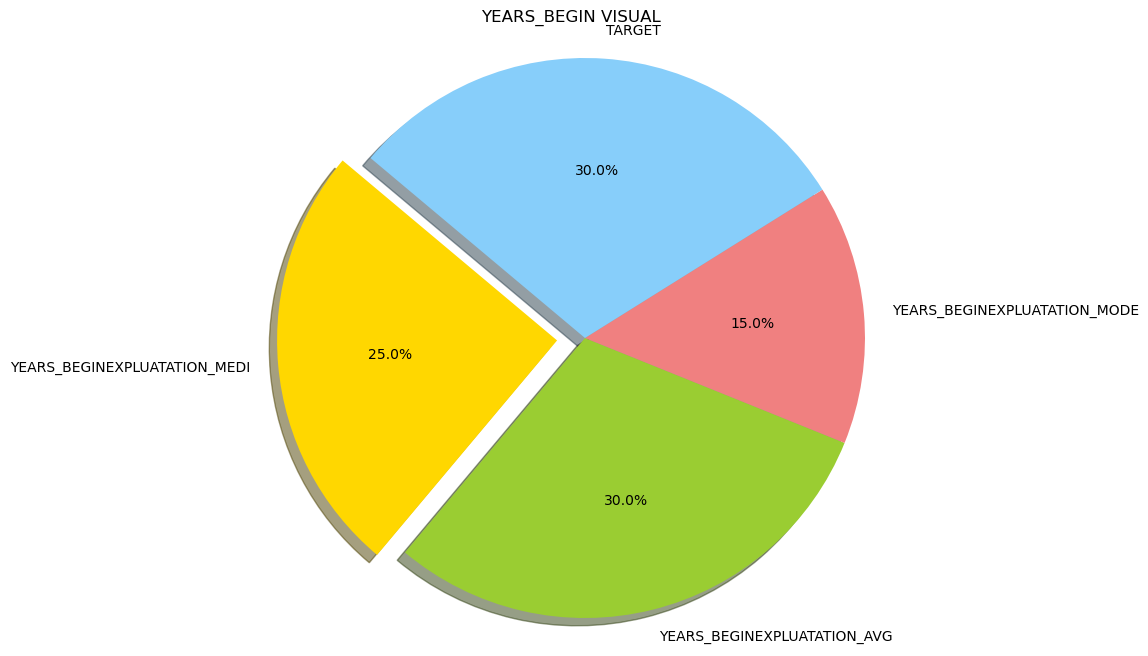

In [130]:
# Data
labels = ['YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG ', 'YEARS_BEGINEXPLUATATION_MODE', 'TARGET']
sizes = [25, 30, 15, 30]  # Sizes or proportions of each category
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']  # Colors for each category
explode = (0.1, 0, 0, 0)  # Explode first slice (i.e., 'Category A')

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('YEARS_BEGIN VISUAL')
plt.show()

FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
FLOORSMAX_AVG                   153020

Define: Define:Normalized information about buildings where 
the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, 


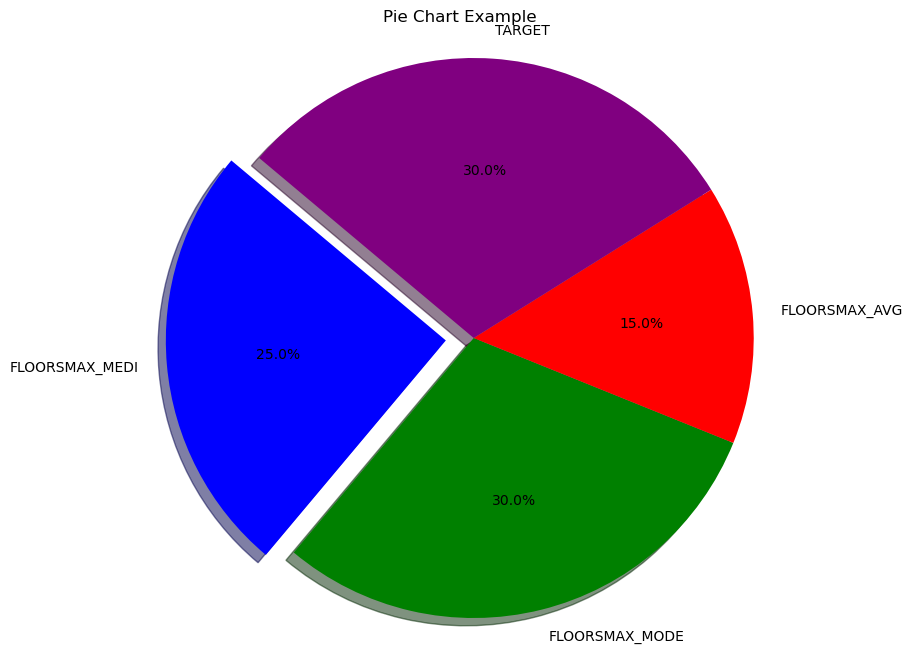

In [131]:
# Data FLOORSMAX
labels = ['FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'TARGET']
sizes = [25, 30, 15, 30]  # Sizes or proportions of each category
colors = ['blue', 'green', 'red', 'purple']  # New colors for each category
explode = (0.1, 0, 0, 0)  # Explode first slice (i.e., 'Category A')

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart Example')
plt.show()

AMT_CREDIT define:Is the approve amount which is given to the consume.
    #no missing values 

Review any values 

In [132]:
# transforming or preprocessing the data 

In [133]:
App_score_col_removed.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120        Laborers              1.0   
1            -1186.0             -291      Core staff              2.0   
2            -4260.0            -2531        Laborers              1.0   
3            -9833.0            -2437        Laborers              2.0   
4            -4311.0            -3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3               

Lookind to Treat any Negative numerical data and change to postive


In [134]:
#'DAYS_'

days_col = []

for col in App_score_col_removed.columns:
    if col.startswith('DAYS'):
        days_col.append(col)
        
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [135]:
#Absolute will address negative data

In [136]:
for col in days_col:
    App_score_col_removed[col] = abs(App_score_col_removed[col])

In [137]:
App_score_col_removed.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.010032       19046            225   
3  House / apartment                    0.008019       19005           3039   
4  House / apartment                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             4260.0             2531        Laborers              1.0   
3             9833.0             2437        Laborers              2.0   
4             4311.0             3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3               

Checking addtional field for Equal-width binning and outliers

In [138]:
len(App_score_col_removed.columns)

51

In [139]:
#checking for continues variables 
App_score_col_removed.nunique().sort_values()

REG_REGION_NOT_LIVE_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_REGION_NOT_WORK_REGION           2
LIVE_CITY_NOT_WORK_CITY              2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
REGION_RATING_CLIENT_W_CITY          3
REGION_RATING_CLIENT                 3
AMT_REQ_CREDIT_BUREAU_HOUR           5
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
NAME_TYPE_SUITE                      7
WEEKDAY_APPR_PROCESS_START           7
NAME_INCOME_TYPE                     8
AMT_REQ_CREDIT_BUREAU_DAY            9
AMT_REQ_CREDIT_BUREAU_WEEK           9
DEF_60_CNT_SOCIAL_CIRCLE             9
DEF_30_CNT_SOCIAL_CIRCLE            10
AMT_REQ_CREDIT_BUREAU_QRT           11
CNT_CHILDREN                        15
CNT_FAM_MEMBERS          

#Will review the below larger numerical columns to identify how the data is displayed and make necessary changes 'binning'

AMT_GOODS_PRICE                   1002
AMT_INCOME_TOTAL                  2548
DAYS_LAST_PHONE_CHANGE            3773
TOTALAREA_MODE                    5116
AMT_CREDIT                        5603
DAYS_ID_PUBLISH                   6168
DAYS_EMPLOYED                    12574
AMT_ANNUITY                      13673
DAYS_REGISTRATION                15688
DAYS_BIRTH                       17460

In [141]:
App_score_col_removed['OBS_30_CNT_SOCIAL_CIRCLE'].unique()
#How many observation of client's social surroundings with observable 30 DPD (days past due) default

array([  2.,   1.,   0.,   4.,   8.,  10.,   7.,   3.,   6.,   5.,  12.,
         9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,  19.,
        18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,  30.])

In [142]:
App_score_col_removed['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

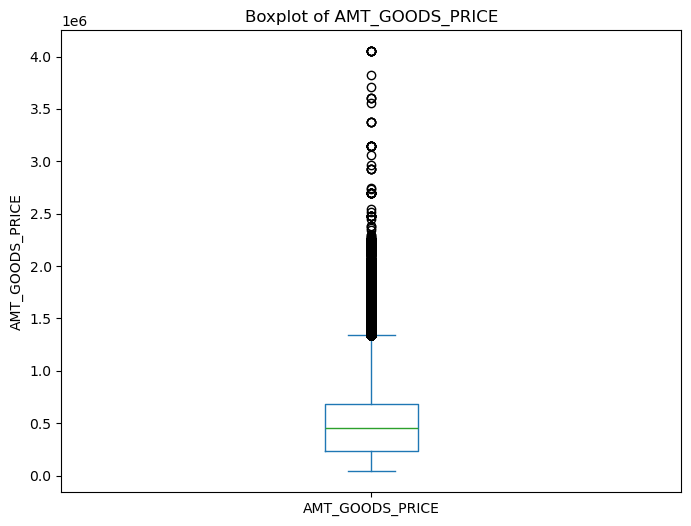

In [143]:
#boxplot for the 'AMT_GOODS_PRICE' column
plt.figure(figsize=(8, 6))
App_score_col_removed['AMT_GOODS_PRICE'].plot(kind='box')
plt.title('Boxplot of AMT_GOODS_PRICE')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

In [144]:
App_score_col_removed['AMT_GOODS_PRICE'].quantile([0,1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.00      40500.0
1.00    4050000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [145]:
#data shows collected funds under 1.million
# Define bins and labels
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, float('inf')]
ranges = ['0-100k', '100-200k', '200-300k', '300-400k', '400-500k', '500-600k', '600-700k', '700-800k', '800-900k', 'Above-900k']

# Apply binning
App_score_col_removed['AMT_GOODS_PRICE'] = pd.cut(App_score_col_removed['AMT_GOODS_PRICE'], bins=bins, labels=ranges, right=False)

# Display the updated DataFrame
print(App_score_col_removed['AMT_GOODS_PRICE'])

0           300-400k
1         Above-900k
2           100-200k
3           200-300k
4           500-600k
             ...    
307506      200-300k
307507      200-300k
307508      500-600k
307509      300-400k
307510      600-700k
Name: AMT_GOODS_PRICE, Length: 307511, dtype: category
Categories (10, object): ['0-100k' < '100-200k' < '200-300k' < '300-400k' ... '600-700k' < '700-800k' < '800-900k' < 'Above-900k']


In [146]:
App_score_col_removed['AMT_INCOME_TOTAL'].agg(['min','max','median'])

min           25650.0
max       117000000.0
median       147150.0
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

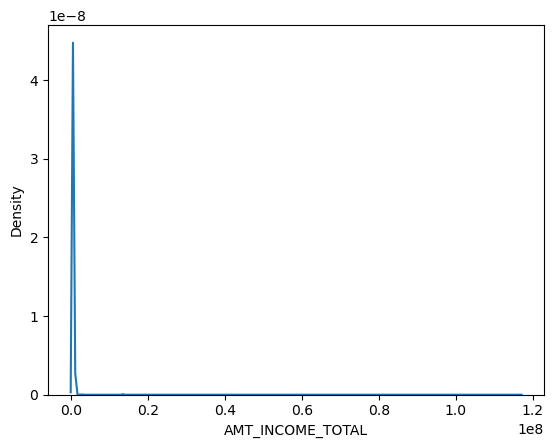

In [147]:
sns.kdeplot(data=App_score_col_removed,x='AMT_INCOME_TOTAL')

In [166]:
App_score_col_removed['AMT_ANNUITY'].max()

258025.5

In [168]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

App_score_col_removed['AMT_ANNUITY'] = pd.cut(App_score_col_removed['AMT_ANNUITY'],bins,labels=ranges)

In [169]:
App_score_col_removed.groupby(['AMT_ANNUITY']).size()

AMT_ANNUITY
0-25K         154867
25K-50K       131335
50K-100K       20792
100K-150K        437
150K-200K         32
Above 200K        36
dtype: int64

In [170]:
App_score_col_removed['AMT_ANNUITY'].isnull().sum()

12

In [148]:
App_score_col_removed['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [149]:
App_score_col_removed['DAYS_EMPLOYED'].unique()

array([  637,  1188,   225, ..., 12971, 11084,  8694])

In [150]:
#max       365243.0

bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35','35Y-40Y','40Y-45Y','45Y-50Y','Above-50Y']

# Apply binning
App_score_col_removed['DAYS_EMPLOYED'] = pd.cut(App_score_col_removed['DAYS_EMPLOYED'], bins,labels=ranges)

# Display the updated DataFrame
print(App_score_col_removed['DAYS_EMPLOYED'])

0              0-5Y
1              0-5Y
2              0-5Y
3            5Y-10Y
4            5Y-10Y
            ...    
307506         0-5Y
307507    Above-50Y
307508      20Y-25Y
307509      10Y-15Y
307510         0-5Y
Name: DAYS_EMPLOYED, Length: 307511, dtype: category
Categories (11, object): ['0-5Y' < '5Y-10Y' < '10Y-15Y' < '15Y-20Y' ... '35Y-40Y' < '40Y-45Y' < '45Y-50Y' < 'Above-50Y']


In [151]:
App_score_col_removed.groupby(['DAYS_EMPLOYED']).size()

DAYS_EMPLOYED
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35         1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
Above-50Y     55374
dtype: int64

In [160]:
App_score_col_removed['DAYS_BIRTH'].min()

-25229

In [162]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above-60Y']

# Apply binning
App_score_col_removed['DAYS_BIRTH'] = pd.cut(App_score_col_removed['DAYS_BIRTH'], bins=bins, labels=ranges, right=False)

# Display the updated DataFrame
print(App_score_col_removed['DAYS_BIRTH'])


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
307506    NaN
307507    NaN
307508    NaN
307509    NaN
307510    NaN
Name: DAYS_BIRTH, Length: 307511, dtype: category
Categories (6, object): ['20Y' < '20Y-30Y' < '30Y-40Y' < '40Y-50Y' < '50Y-60Y' < 'Above-60Y']


In [164]:
App_score_col_removed['DAYS_BIRTH'].isnull().sum()

307511

Data Analysis

In [162]:
#review the defaulter and non defaulter 

In [163]:
App_score_col_removed.dtypes.value_counts()

#object 11 category 1= 12 chracter and remaining numerical

float64     24
int64       14
object      11
category     1
category     1
Name: count, dtype: int64

In [164]:
App_score_col_removed.select_dtypes(include=['object']).head()

NAME_CONTRACT_TYPE CODE_GENDER NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         Cash loans           M   Unaccompanied          Working   
1         Cash loans           F          Family    State servant   
2    Revolving loans           M   Unaccompanied          Working   
3         Cash loans           F   Unaccompanied          Working   
4         Cash loans           M   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0        Laborers                  WEDNESDAY  Business Entity Type 3   
1      Core staff                     MONDAY                  School   
2        Laborers                     MONDAY              Government   
3        Laborers                  WEDNESDAY  Business Entity Type 3   
4      Core staff                   THURSDAY                Religion   

  EMERGENCYSTATE_MODE  
0                  No  
1                  No  
2                 NaN  
3                 NaN  
4                 NaN

In [165]:
#group charc cols 
object_var = App_score_col_removed.select_dtypes(include=['object']).columns
object_var 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [166]:
App_score_col_removed.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

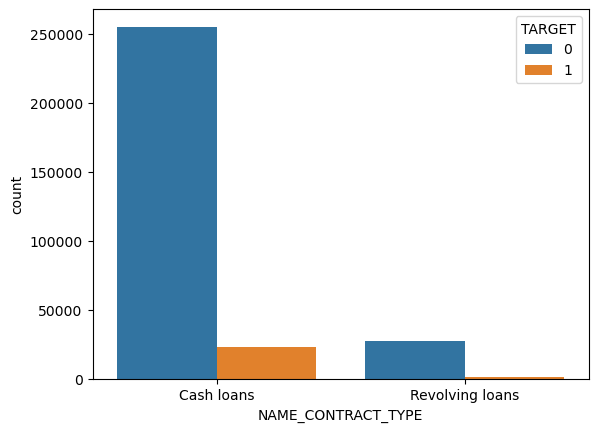

In [167]:
sns.countplot(App_score_col_removed,x='NAME_CONTRACT_TYPE',hue='TARGET')

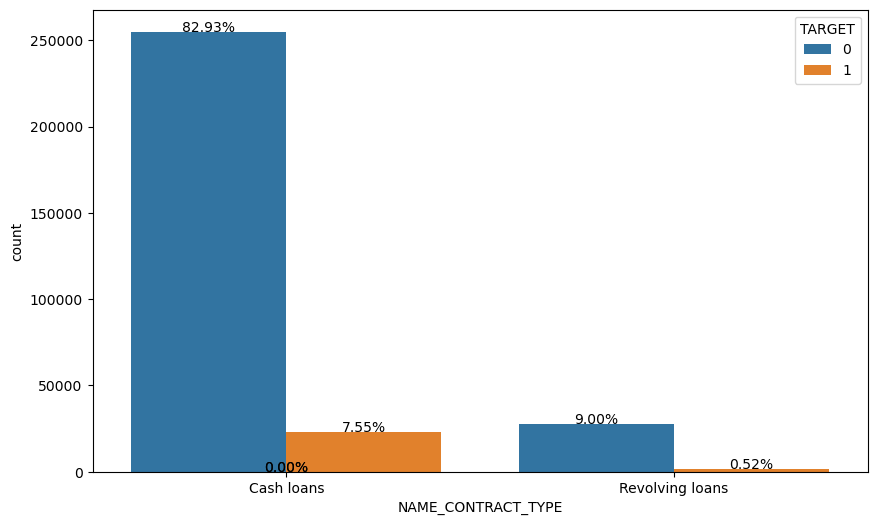

In [168]:
# Filter the DataFrame to remove 'App_score_col_removed/object_var'
columns=['App_score_col_removed']

# Plot the countplot with percentages
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=App_score_col_removed, x='NAME_CONTRACT_TYPE', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
plt.show()

In [169]:
#Cash loans are less likely to be defaulter per the above plot.

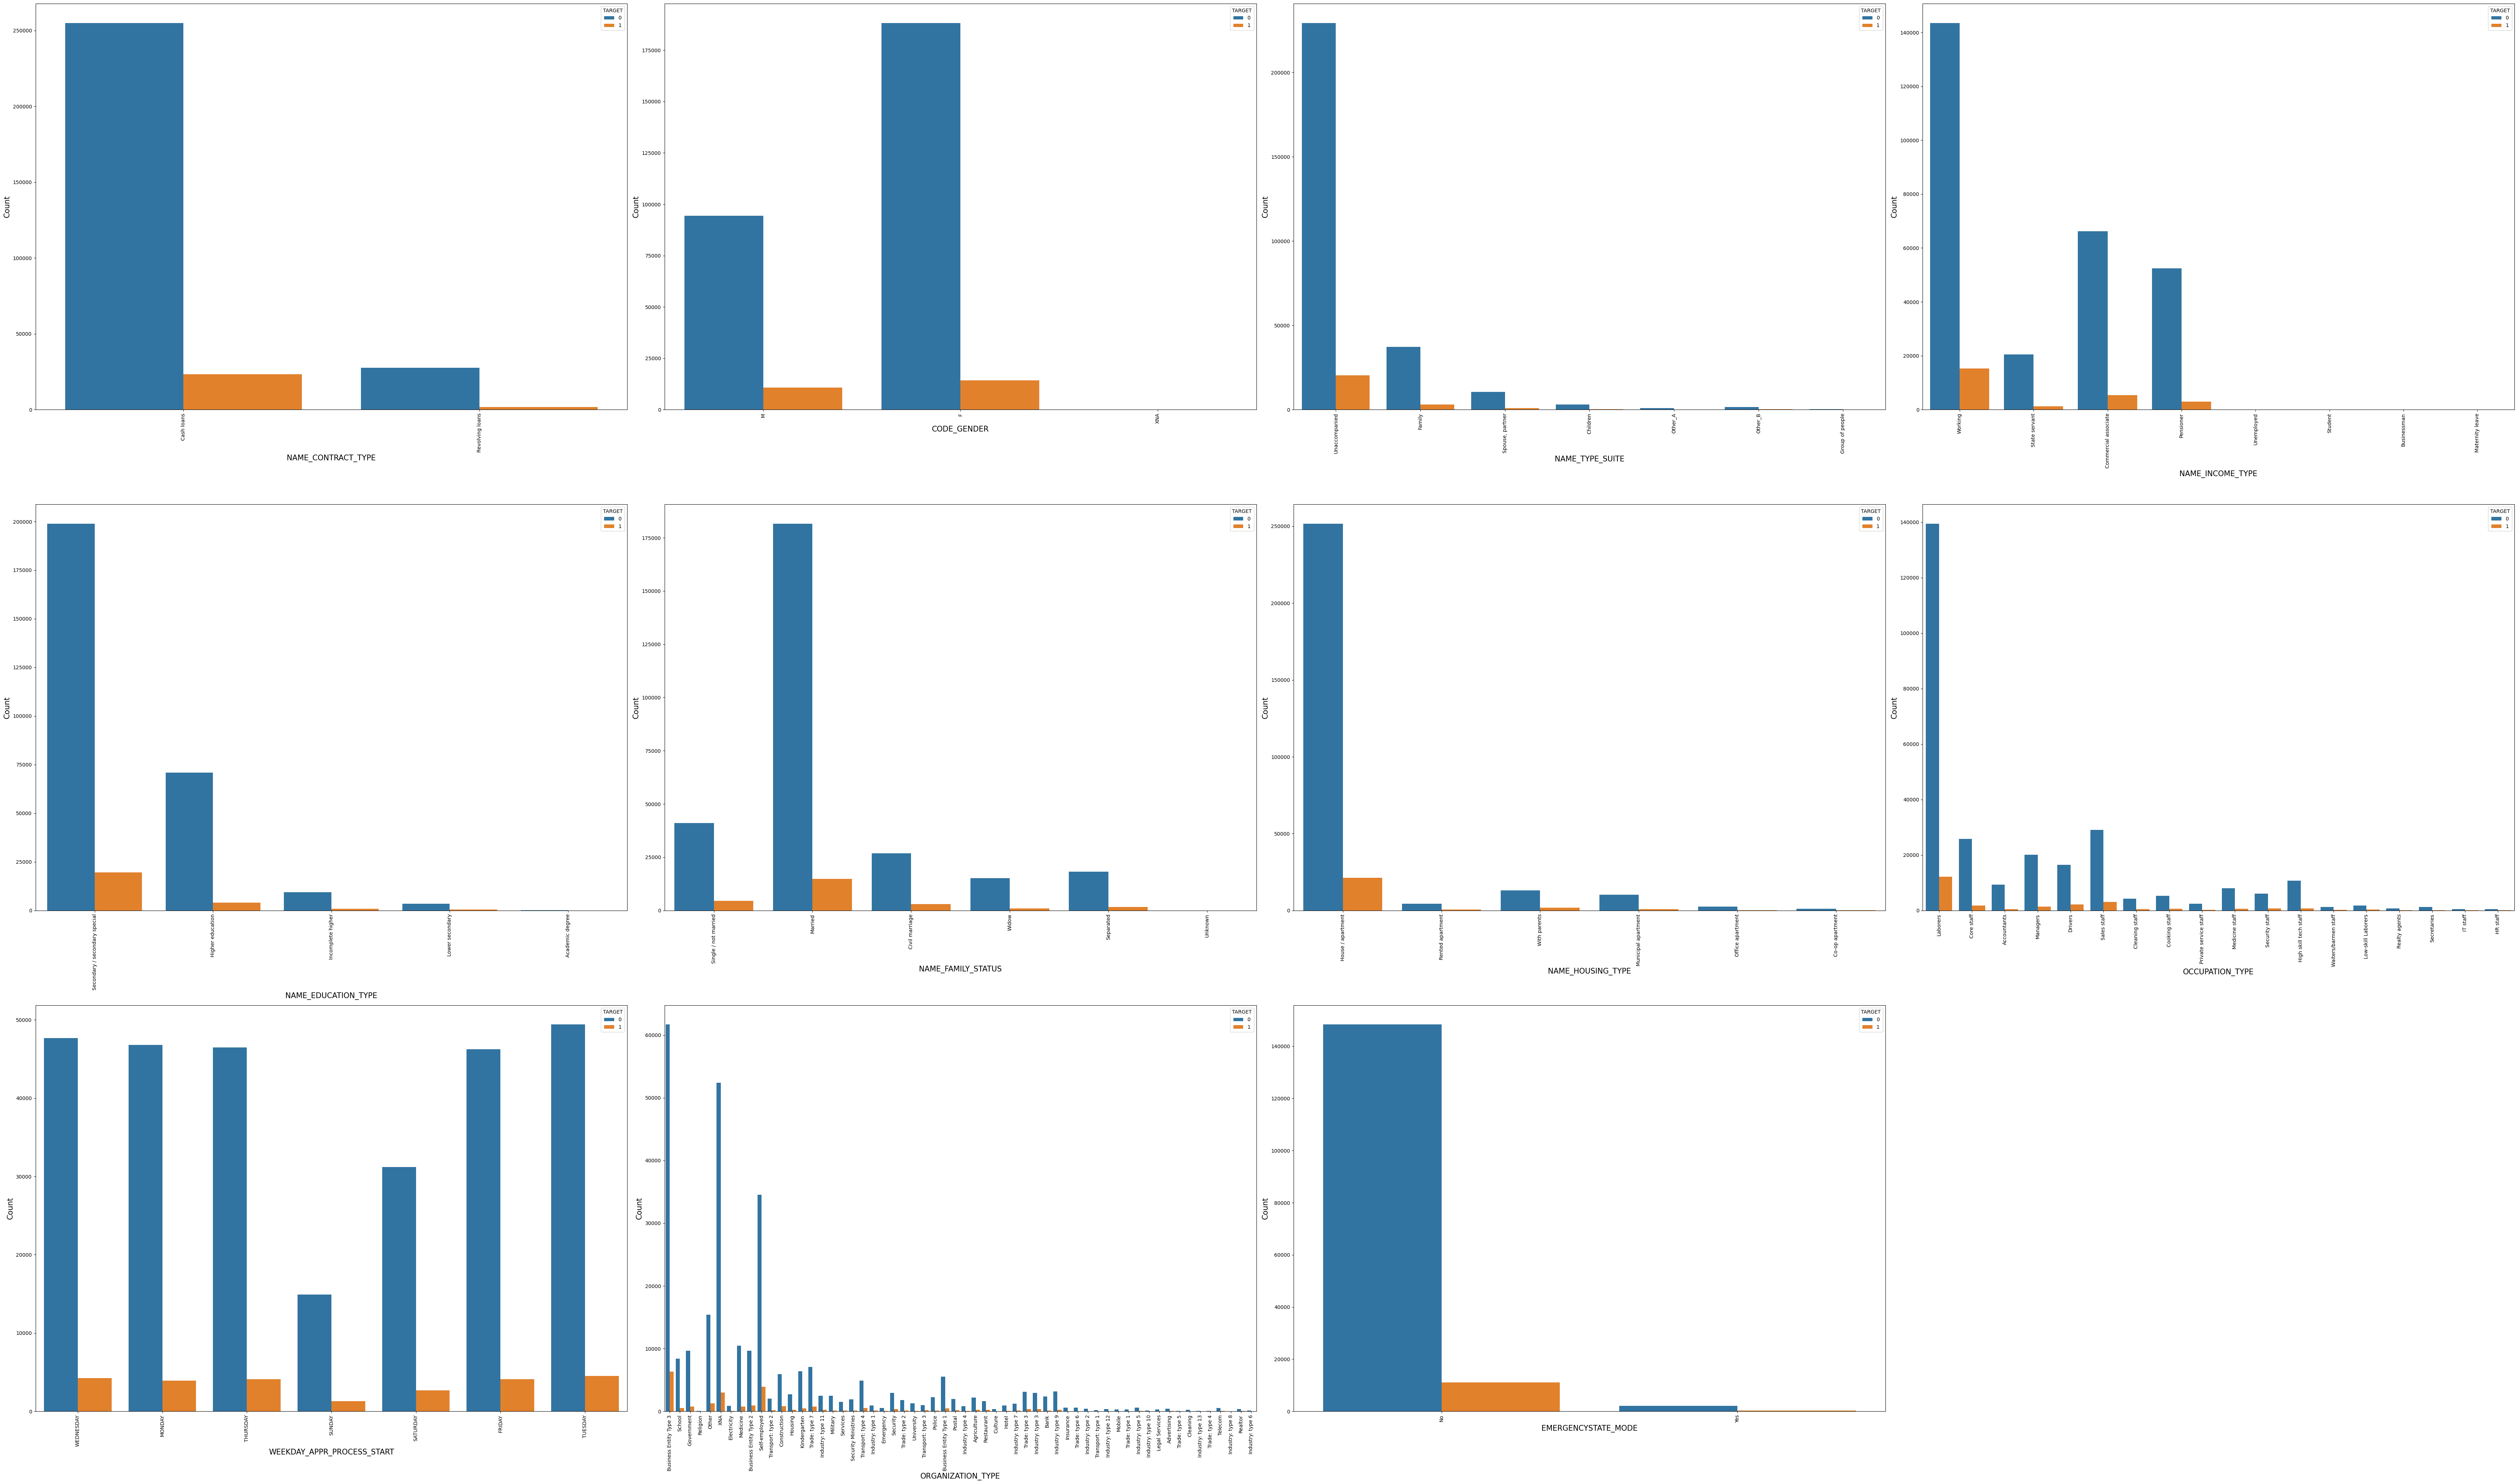

In [170]:
#review of all colomun and view is hard to read.

plt.figure(figsize=(70, 95))

# List of columns to plot
columns_to_plot = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
                   'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                   'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
                   'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']

# Loop through the columns and plot countplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(7, 4, i)
    sns.countplot(data=App_score_col_removed, x=col, hue='TARGET')
    
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.legend(title='TARGET', loc='upper right')
    
    plt.xticks(rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

In [171]:
App_score_col_removed.groupby(['CODE_GENDER']).size()

CODE_GENDER
F      202448
M      105059
XNA         4
dtype: int64

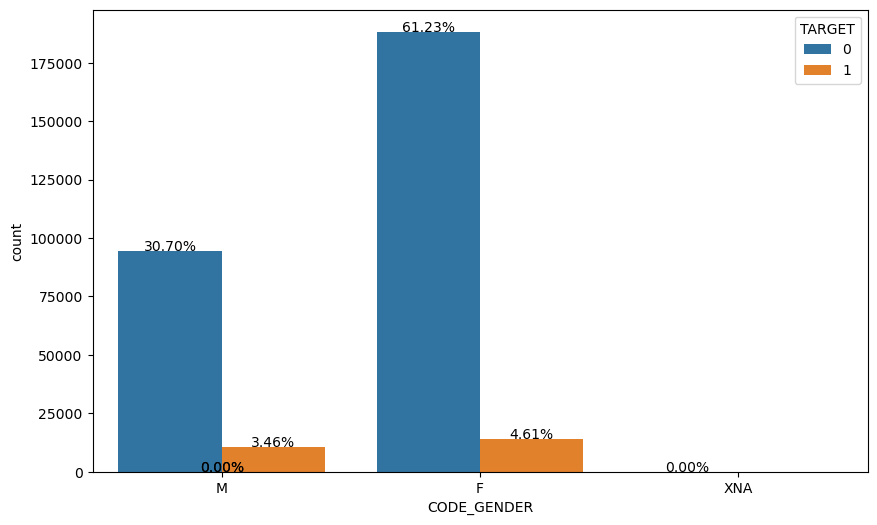

In [172]:
# Filter the DataFrame to remove 'App_score_col_removed'
columns=['App_score_col_removed']

# Plot the countplot with percentages
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=App_score_col_removed, x='CODE_GENDER', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
plt.show()

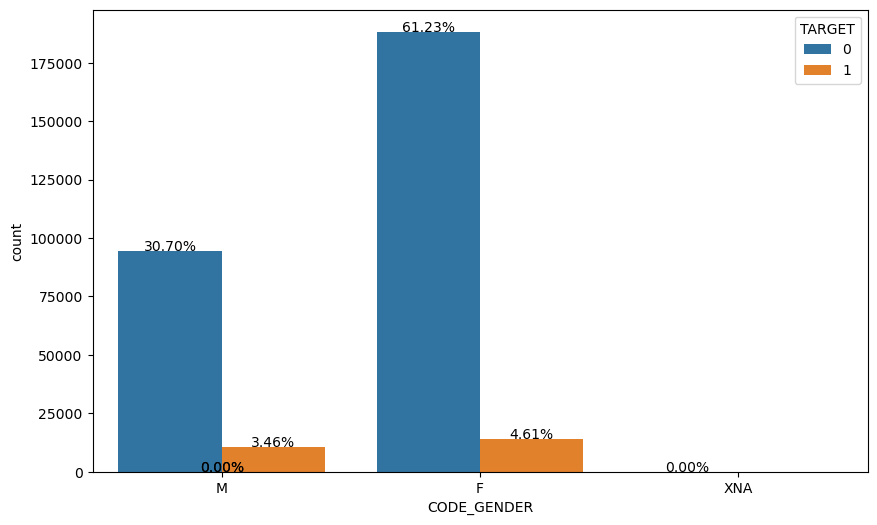

In [173]:
# Filter the DataFrame to remove 'App_score_col_removed'
columns=['App_score_col_removed']

# Plot the countplot with percentages
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=App_score_col_removed, x='CODE_GENDER', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
plt.show()

In [174]:
App_score_col_removed.groupby(['NAME_TYPE_SUITE']).size()  #who accomoany the client while applying for the loan

NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      249818
dtype: int64

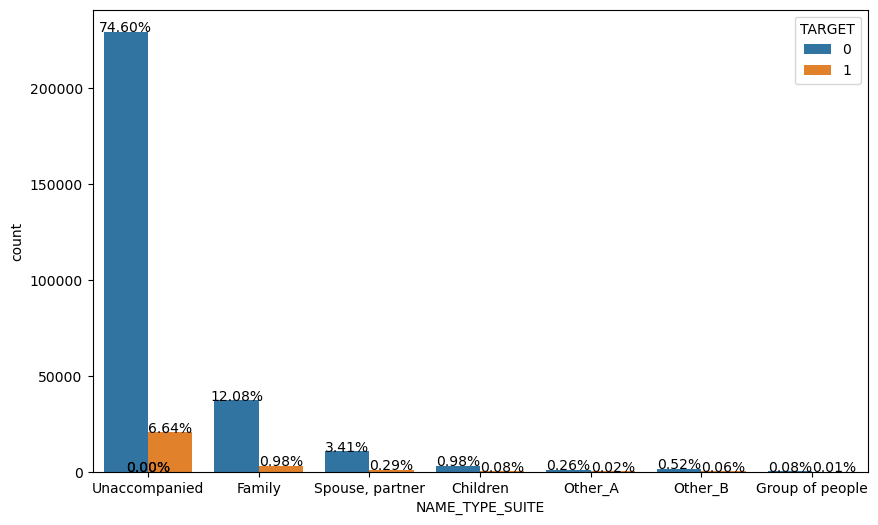

In [175]:
# Filter the DataFrame to remove 'App_score_col_removed'
columns=['App_score_col_removed']

# Plot the countplot with percentages
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=App_score_col_removed, x='NAME_TYPE_SUITE', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
plt.show()

In [176]:
App_score_col_removed.groupby(['NAME_INCOME_TYPE']).size()

NAME_INCOME_TYPE
Businessman                 10
Commercial associate     71617
Maternity leave              5
Pensioner                55362
State servant            21703
Student                     18
Unemployed                  22
Working                 158774
dtype: int64

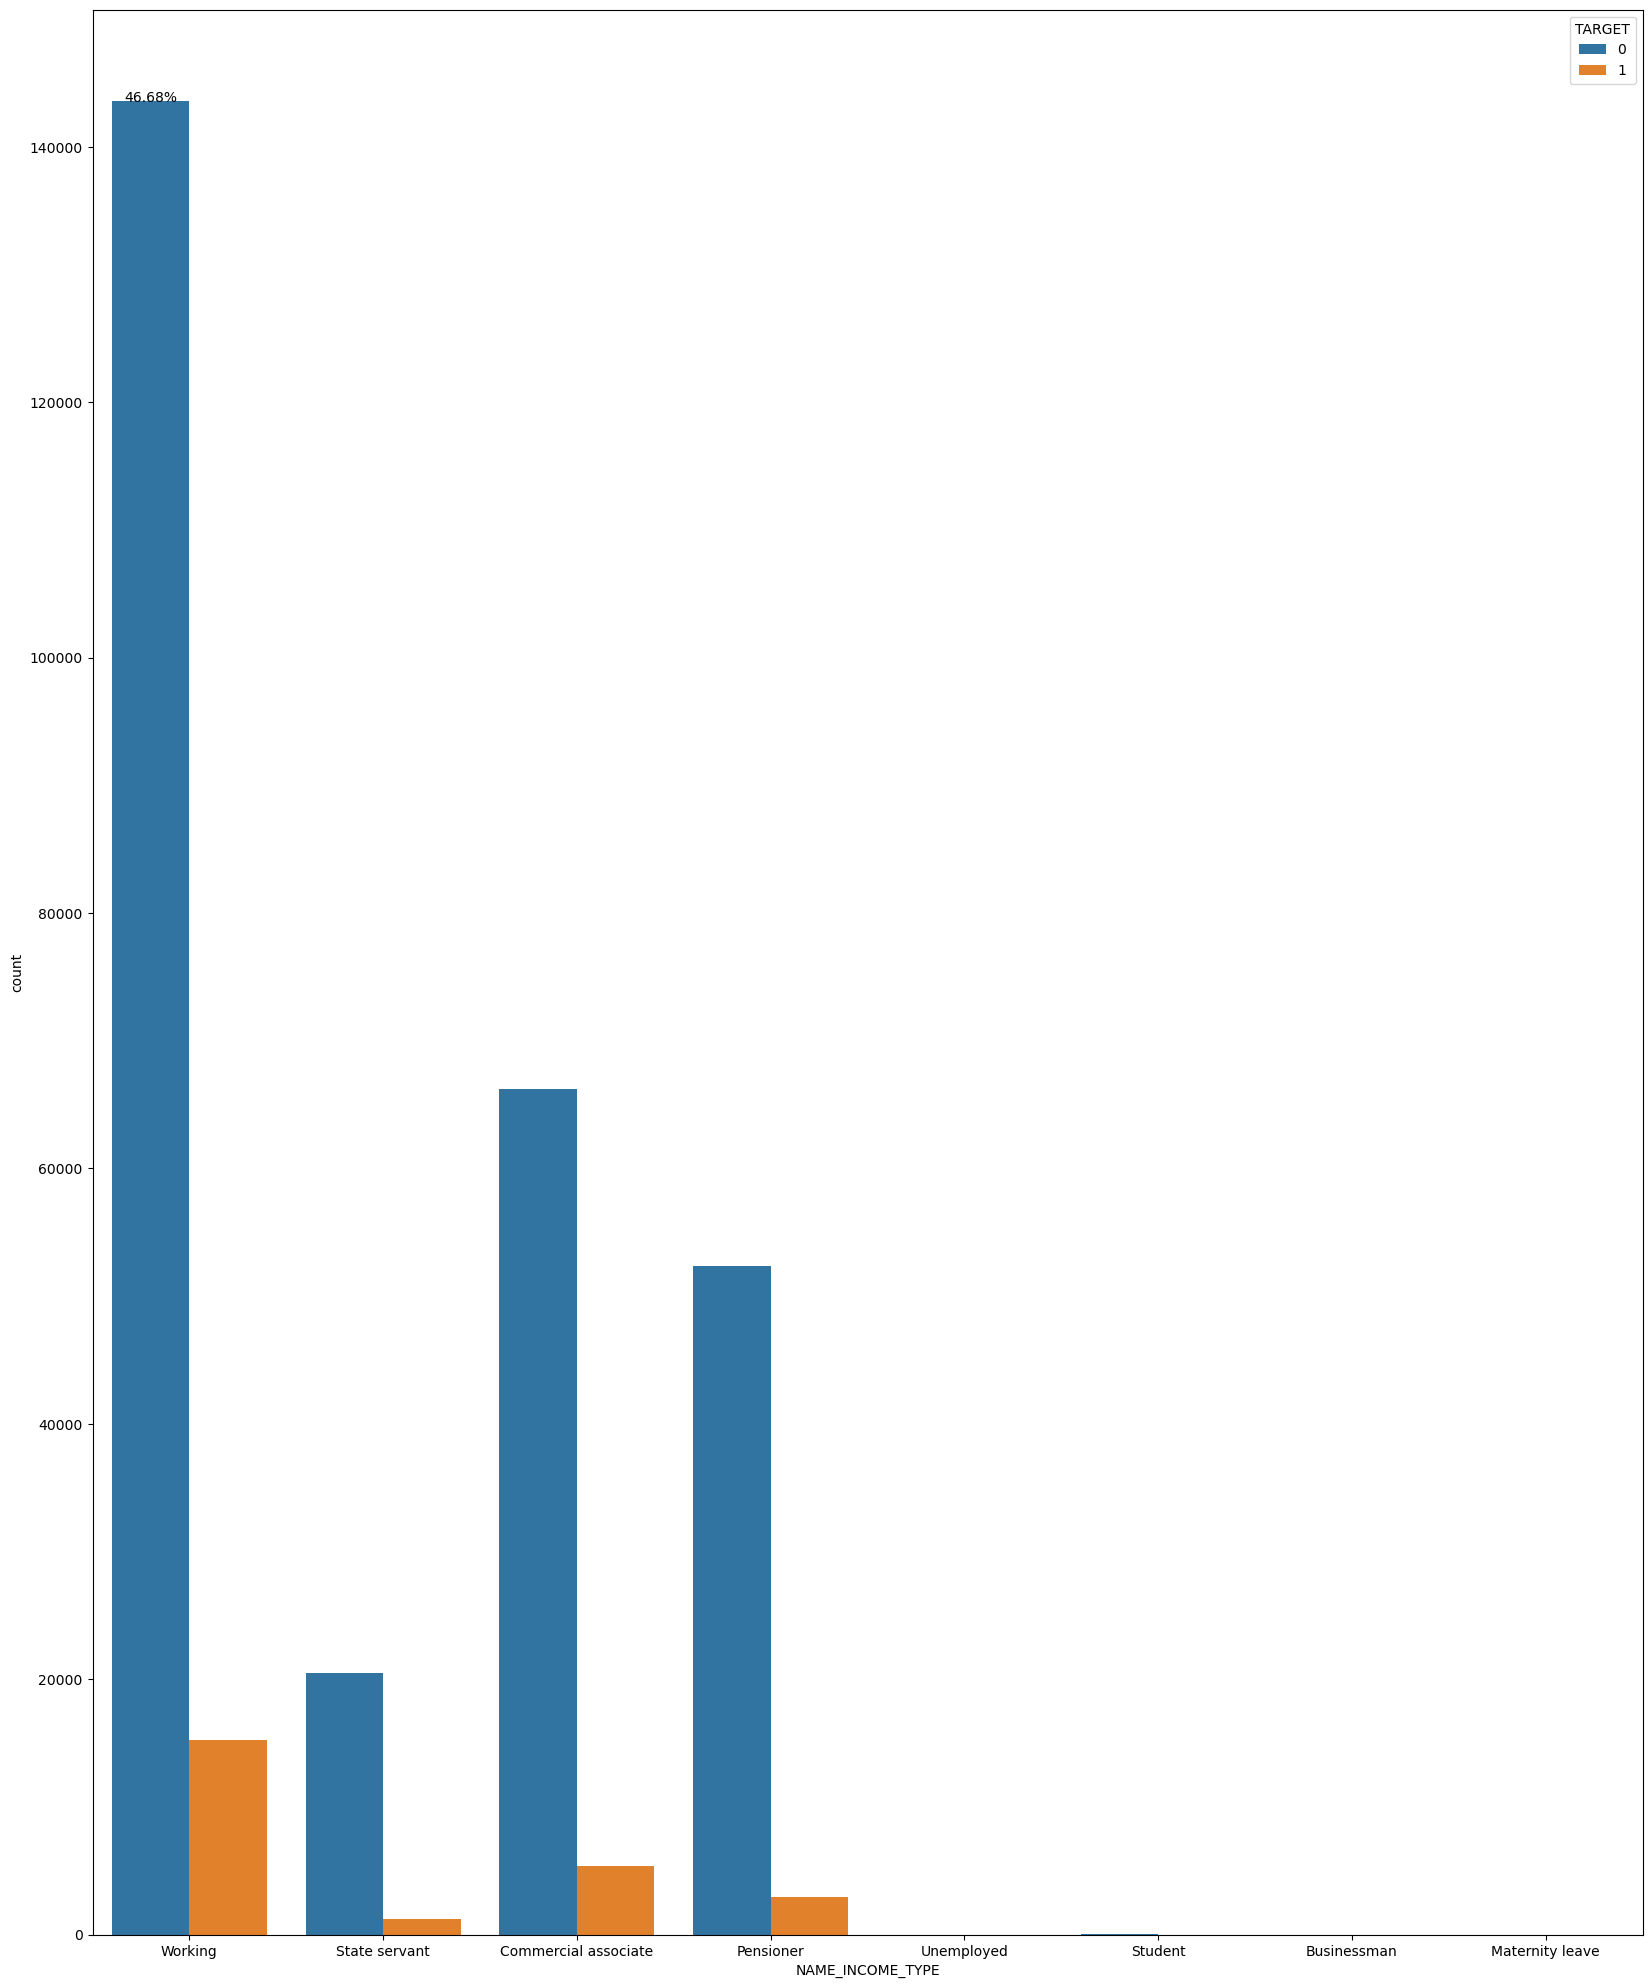

In [177]:
#client income type  when apply for loan
# Filter the DataFrame to remove 'App_score_col_removed'
columns=['App_score_col_removed']

# Plot the countplot with percentages
plt.figure(figsize=(20, 25))
ax = sns.countplot(data=App_score_col_removed, x='NAME_INCOME_TYPE', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
    plt.show()

In [178]:
#level of clients education 
App_score_col_removed.groupby(['NAME_EDUCATION_TYPE']).size()

NAME_EDUCATION_TYPE
Academic degree                     164
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Secondary / secondary special    218391
dtype: int64

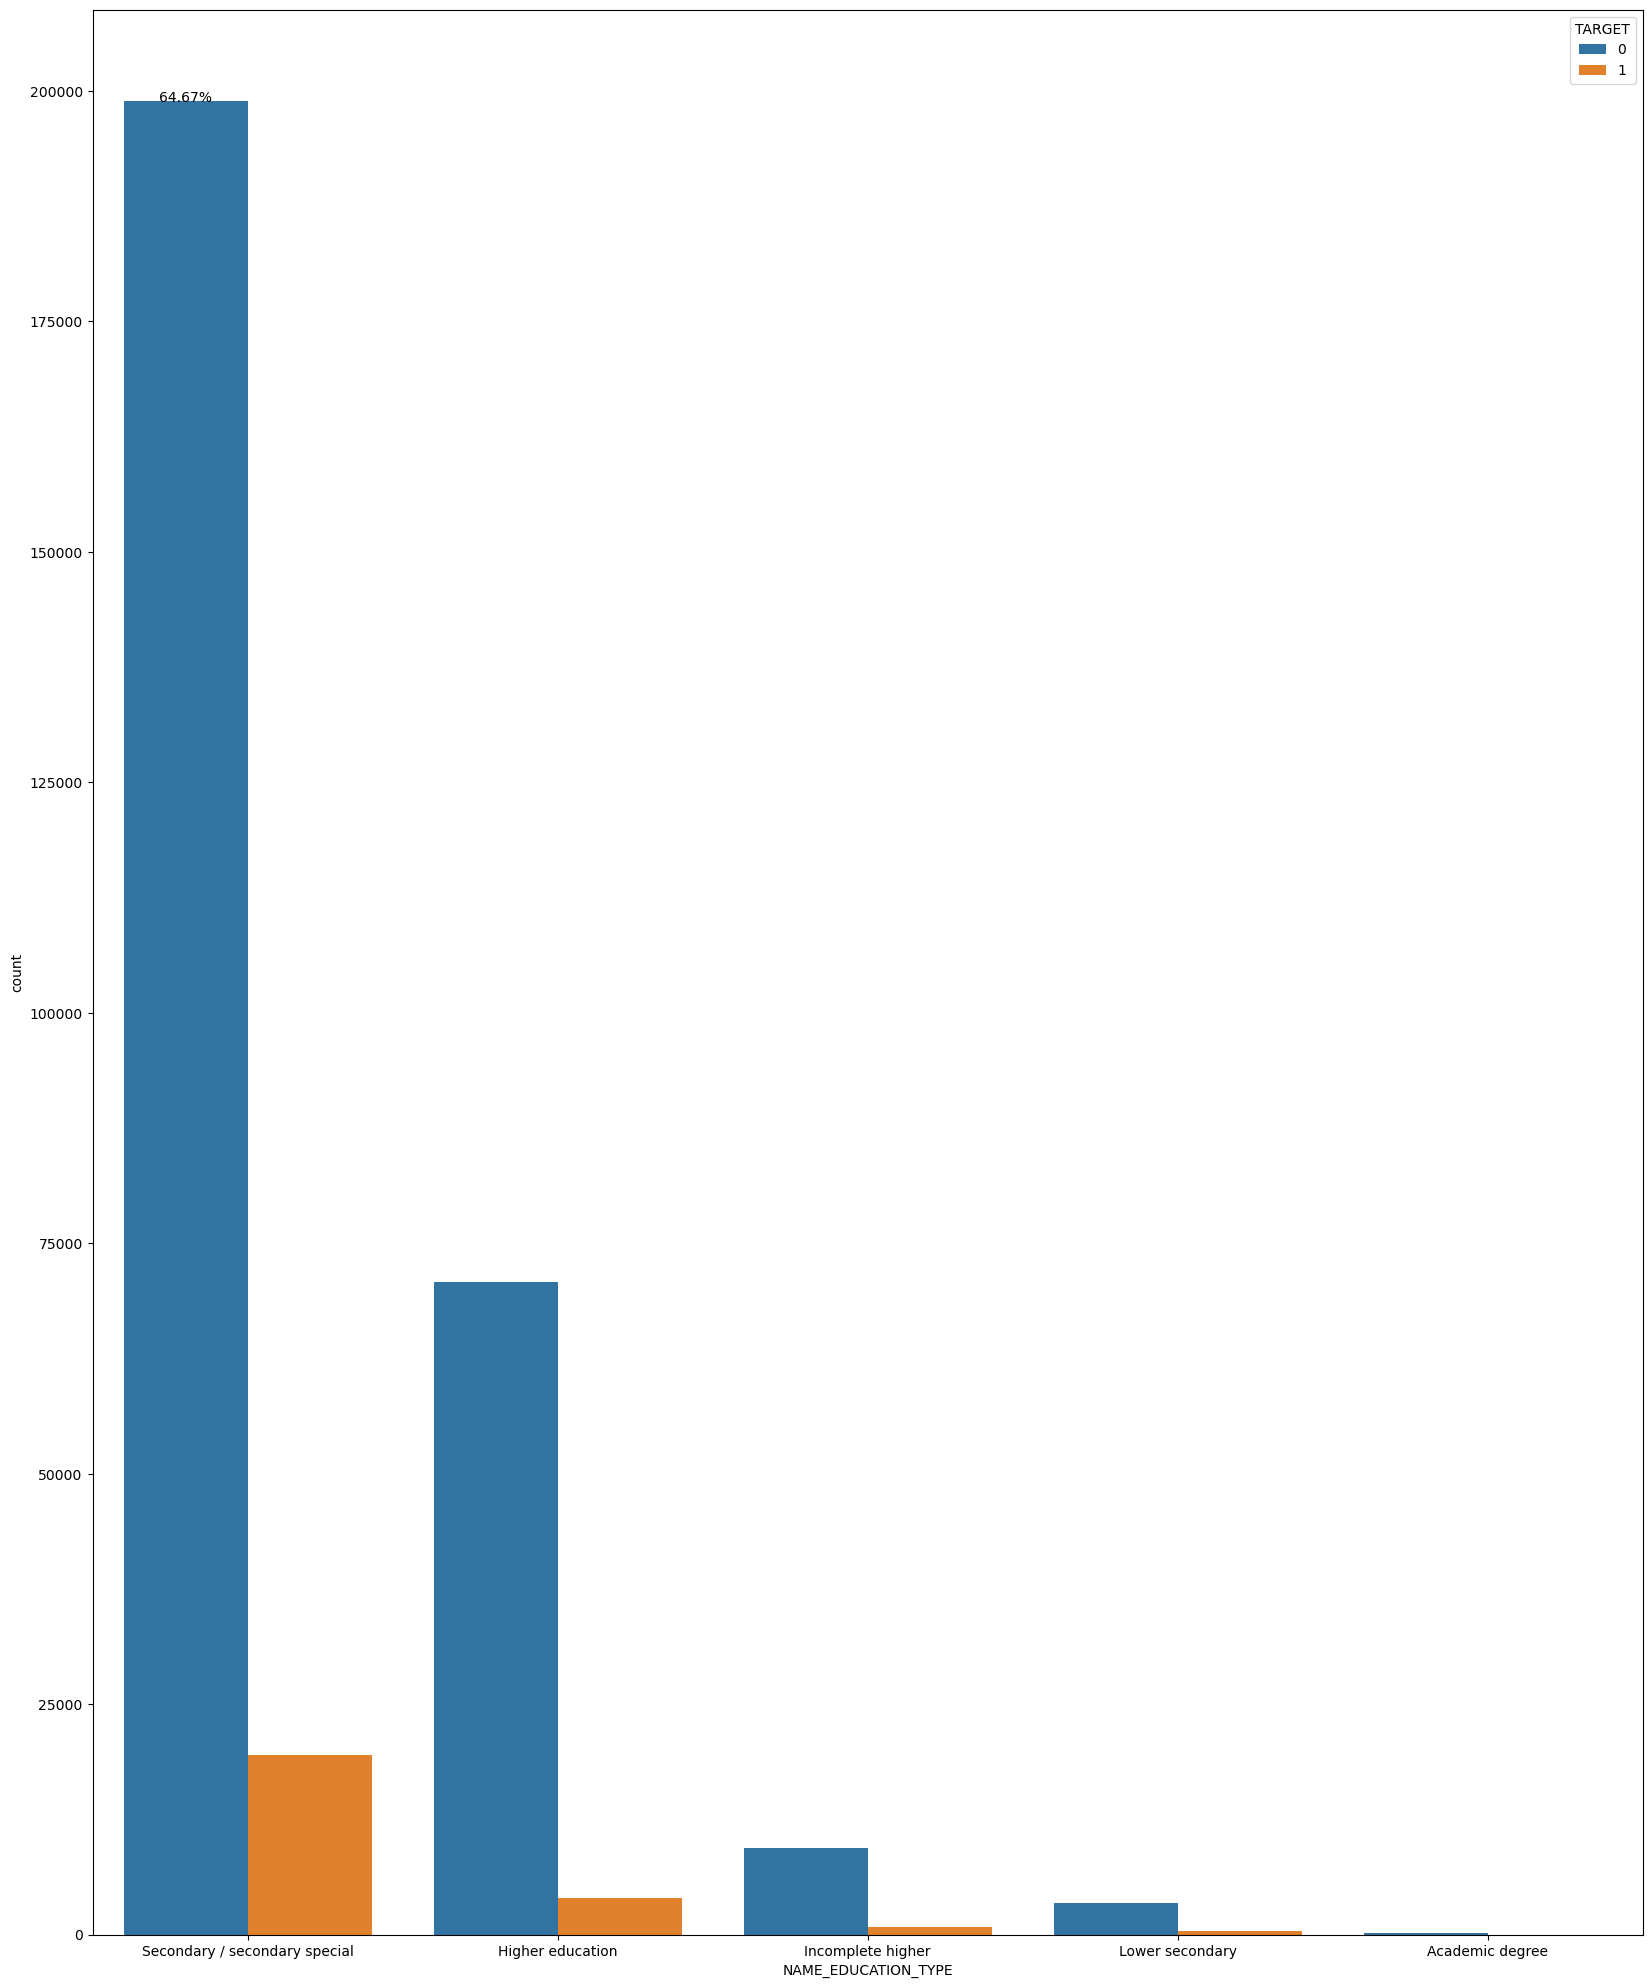

In [179]:
# Filter the DataFrame to remove 'App_score_col_removed'
columns=['App_score_col_removed']

# Plot the countplot with percentages
plt.figure(figsize=(20, 25))
ax = sns.countplot(data=App_score_col_removed, x='NAME_EDUCATION_TYPE', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    plt.show()

In [180]:
App_score_col_removed.groupby(['NAME_FAMILY_STATUS']).size() #family status of client 

NAME_FAMILY_STATUS
Civil marriage           29775
Married                 196432
Separated                19770
Single / not married     45444
Unknown                      2
Widow                    16088
dtype: int64

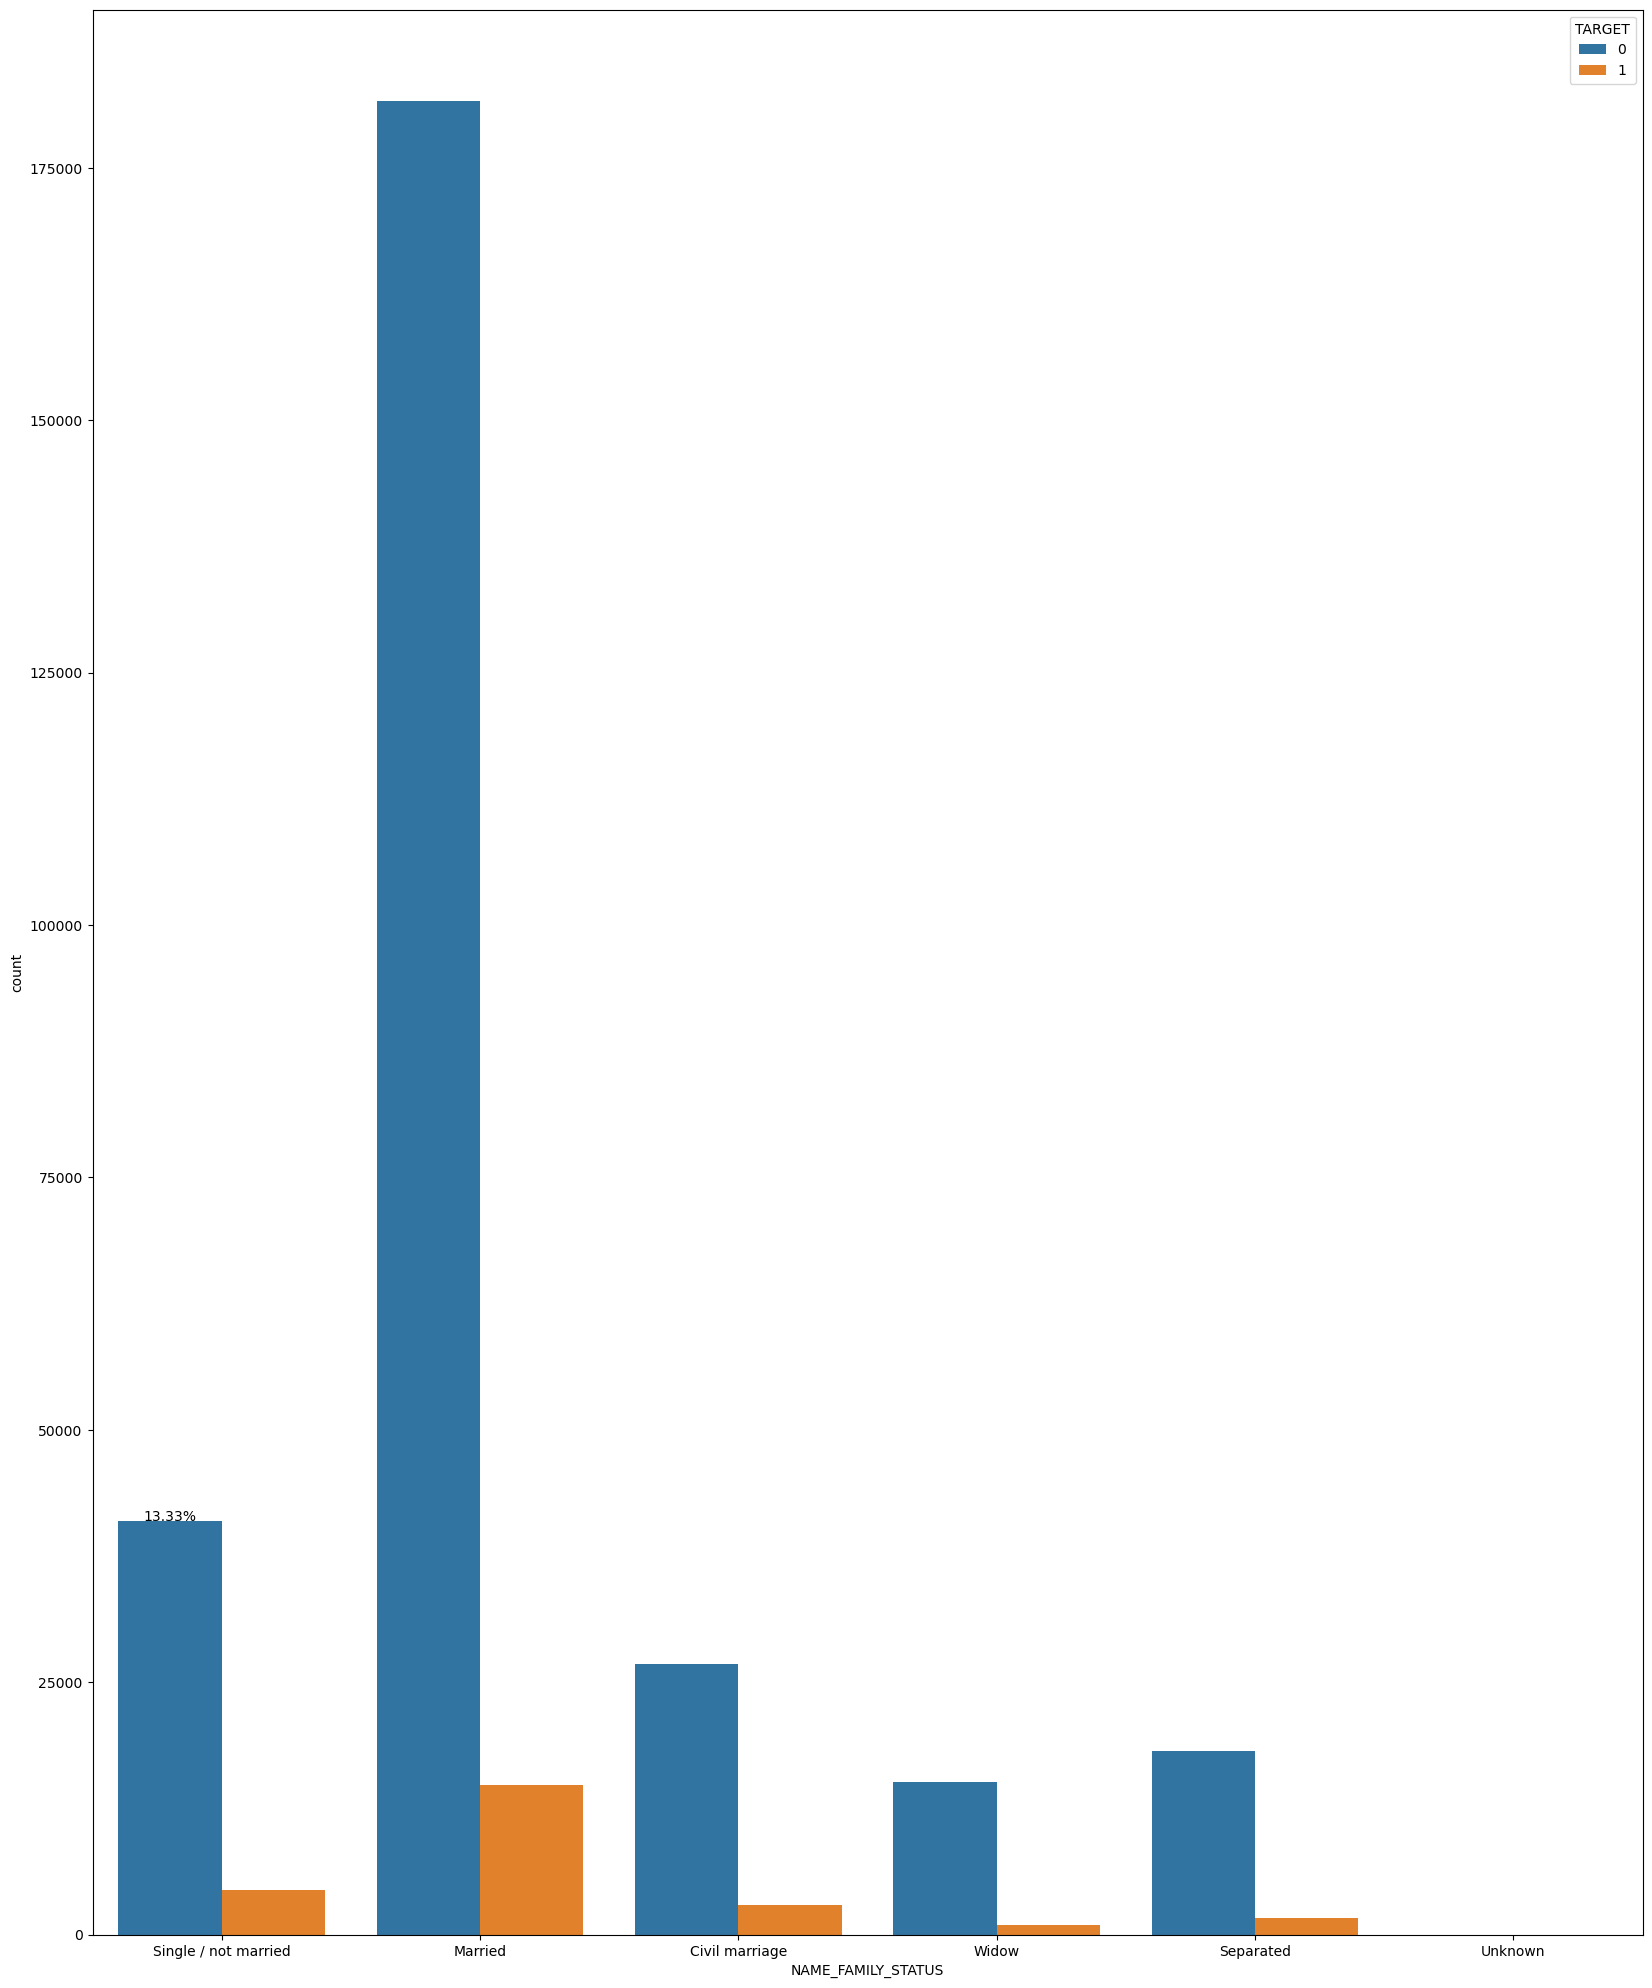

In [181]:
# Filter the DataFrame to remove 'App_score_col_removed'
columns=['App_score_col_removed']

# Plot the countplot with percentages
plt.figure(figsize=(20, 25))
ax = sns.countplot(data=App_score_col_removed, x='NAME_FAMILY_STATUS', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
    plt.show()

In [182]:
App_score_col_removed.groupby(['NAME_HOUSING_TYPE']).size() # confirm client housing status 

NAME_HOUSING_TYPE
Co-op apartment          1122
House / apartment      272868
Municipal apartment     11183
Office apartment         2617
Rented apartment         4881
With parents            14840
dtype: int64

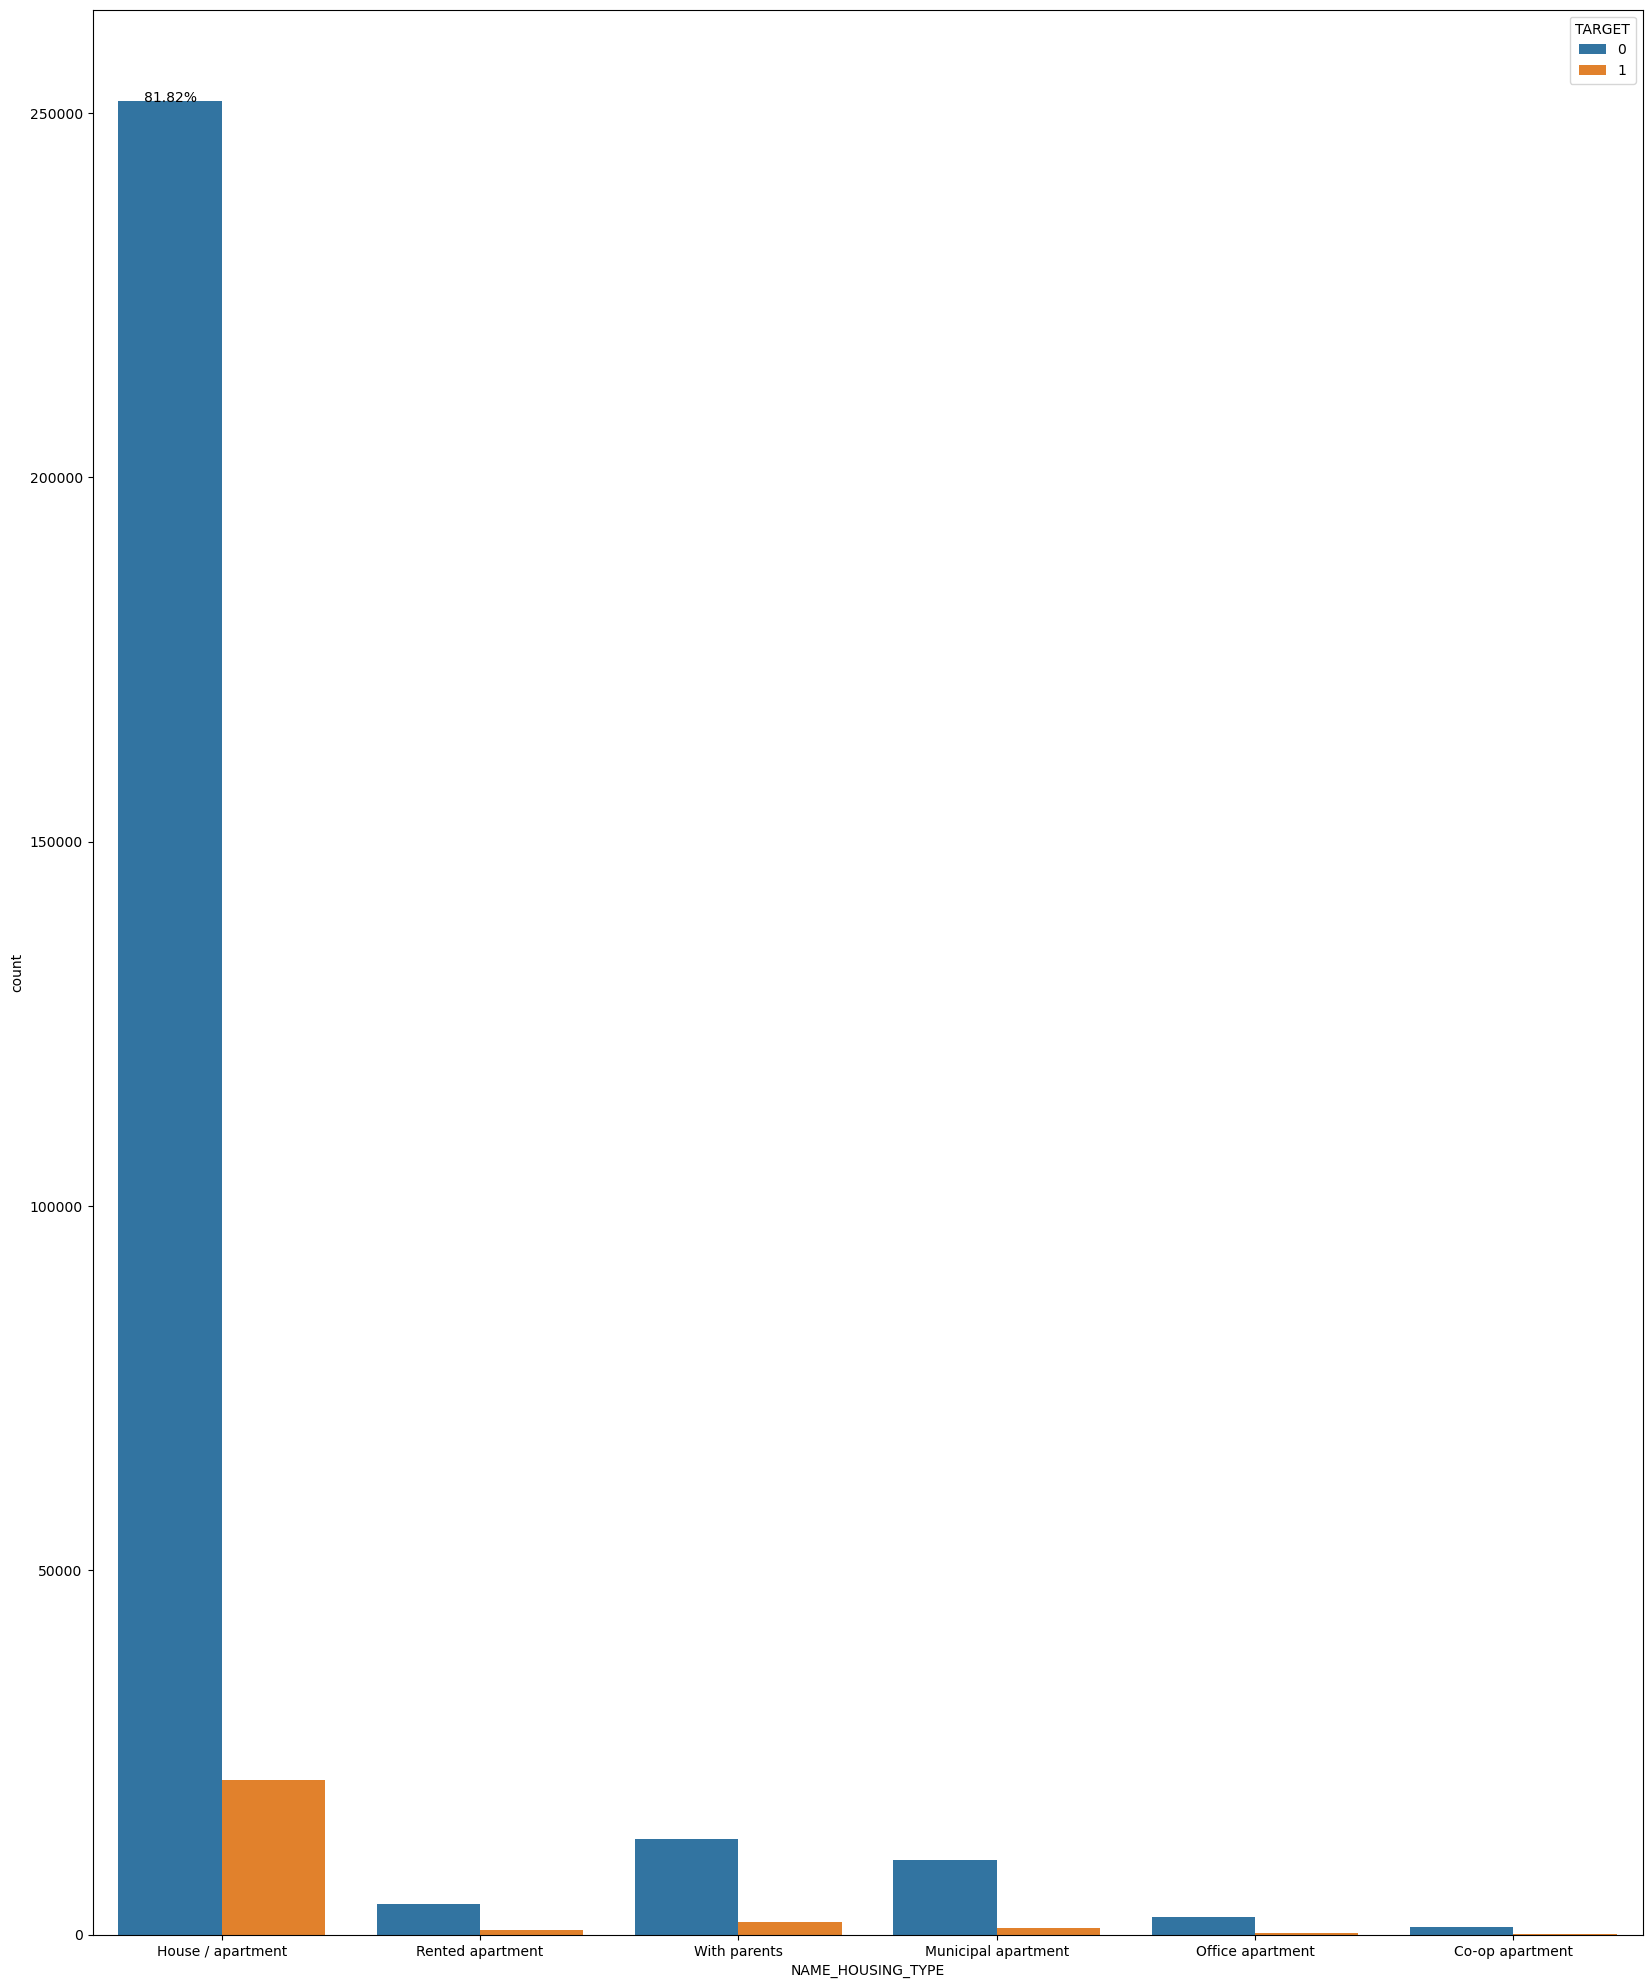

In [183]:
# Filter the DataFrame to remove 'App_score_col_removed'
columns=['App_score_col_removed']

# Plot the countplot with percentages
plt.figure(figsize=(20, 25))
ax = sns.countplot(data=App_score_col_removed, x='NAME_HOUSING_TYPE', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
    plt.show()

In [184]:
App_score_col_removed.groupby(['OCCUPATION_TYPE']).size()

OCCUPATION_TYPE
Accountants                9813
Cleaning staff             4653
Cooking staff              5946
Core staff                27570
Drivers                   18603
HR staff                    563
High skill tech staff     11380
IT staff                    526
Laborers                 151577
Low-skill Laborers         2093
Managers                  21371
Medicine staff             8537
Private service staff      2652
Realty agents               751
Sales staff               32102
Secretaries                1305
Security staff             6721
Waiters/barmen staff       1348
dtype: int64

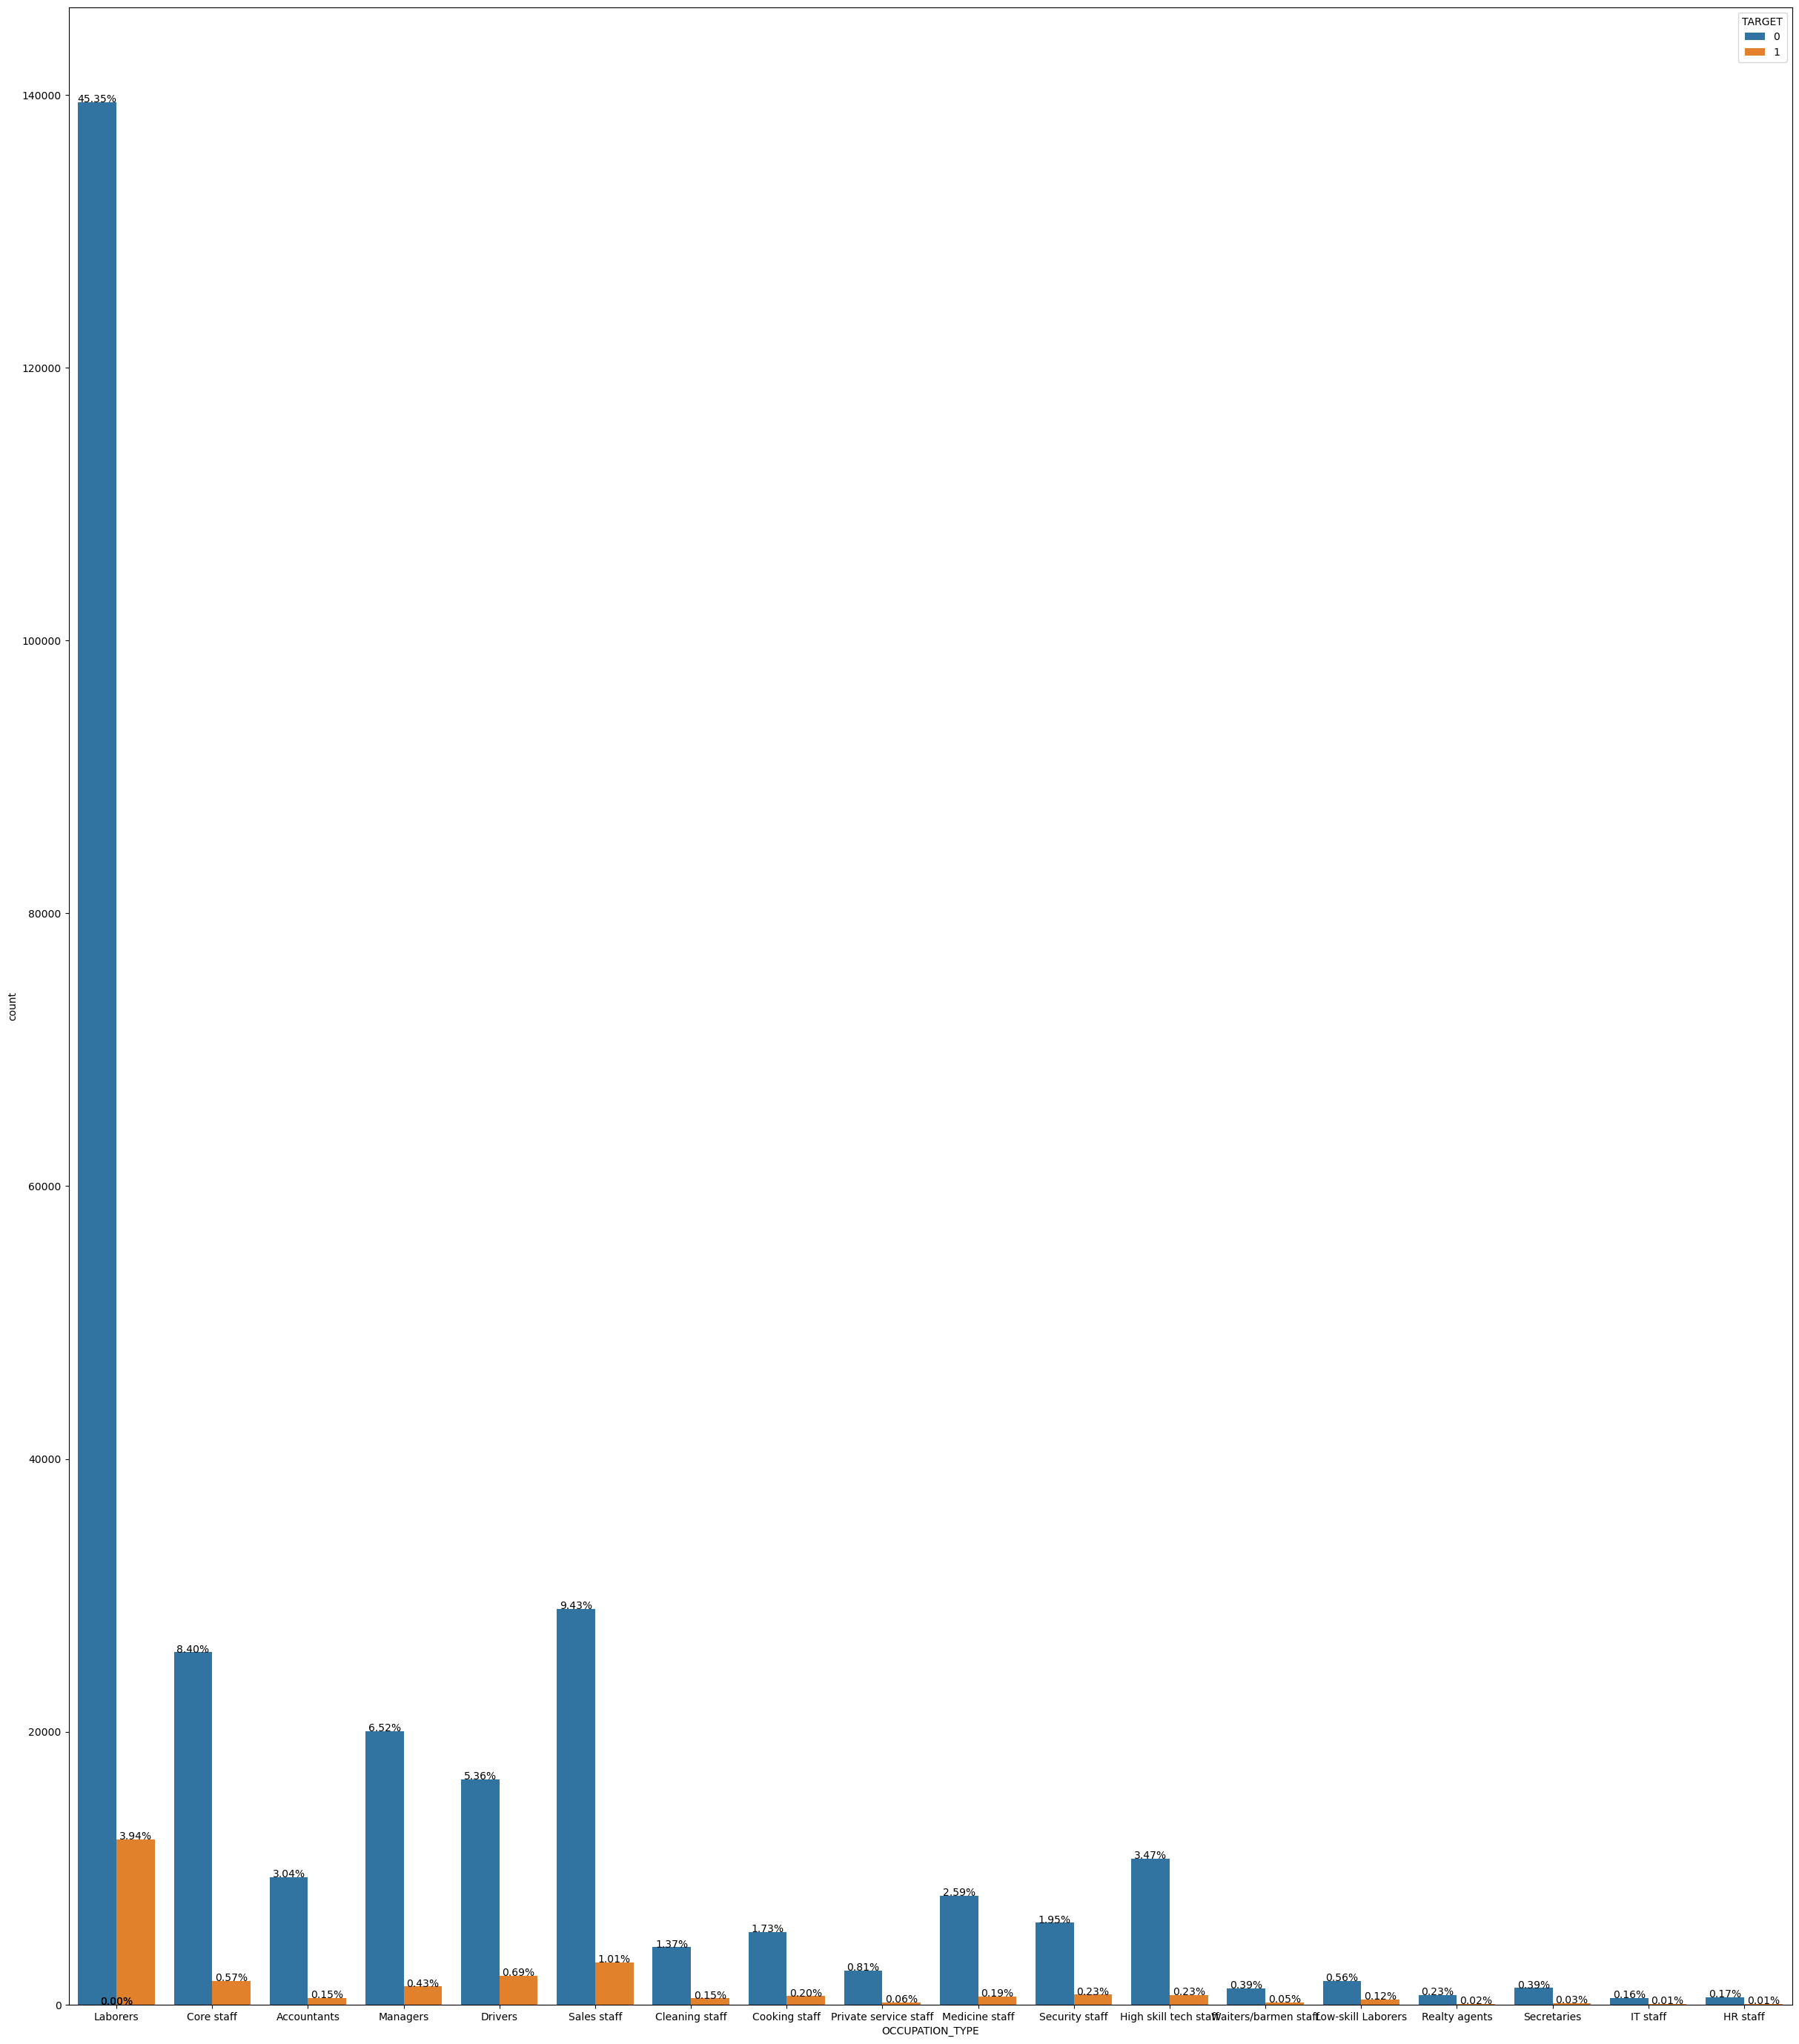

In [185]:
# Filter the DataFrame to remove 'App_score_col_removed'
columns=['App_score_col_removed']

# Plot the countplot with percentages
plt.figure(figsize=(30, 35))
ax = sns.countplot(data=App_score_col_removed, x='OCCUPATION_TYPE', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
plt.show()

In [186]:
App_score_col_removed.groupby(['WEEKDAY_APPR_PROCESS_START']).size()
#On which day of the week did the client apply for previous application 'no need to plot M-F, research for days applied with not affect the target'

WEEKDAY_APPR_PROCESS_START
FRIDAY       50338
MONDAY       50714
SATURDAY     33852
SUNDAY       16181
THURSDAY     50591
TUESDAY      53901
WEDNESDAY    51934
dtype: int64

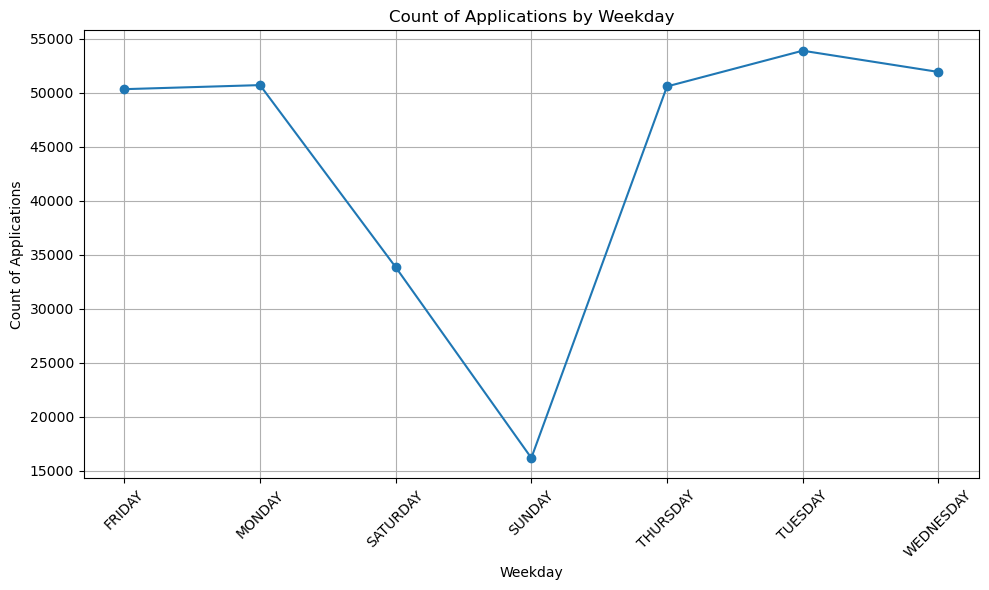

In [176]:
# Extracting the column data for 'WEEKDAY_APPR_PROCESS_START'
weekday_data = App_score_col_removed['WEEKDAY_APPR_PROCESS_START']

# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
weekday_data.value_counts().sort_index().plot(kind='line', marker='o', linestyle='-')  # Plotting the count of occurrences for each weekday
plt.title('Count of Applications by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count of Applications')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [187]:
App_score_col_removed.groupby(['ORGANIZATION_TYPE']).size()

ORGANIZATION_TYPE
Advertising                 429
Agriculture                2454
Bank                       2507
Business Entity Type 1     5984
Business Entity Type 2    10553
Business Entity Type 3    67992
Cleaning                    260
Construction               6721
Culture                     379
Electricity                 950
Emergency                   560
Government                10404
Hotel                       966
Housing                    2958
Industry: type 1           1039
Industry: type 10           109
Industry: type 11          2704
Industry: type 12           369
Industry: type 13            67
Industry: type 2            458
Industry: type 3           3278
Industry: type 4            877
Industry: type 5            599
Industry: type 6            112
Industry: type 7           1307
Industry: type 8             24
Industry: type 9           3368
Insurance                   597
Kindergarten               6880
Legal Services              305
Medicine              

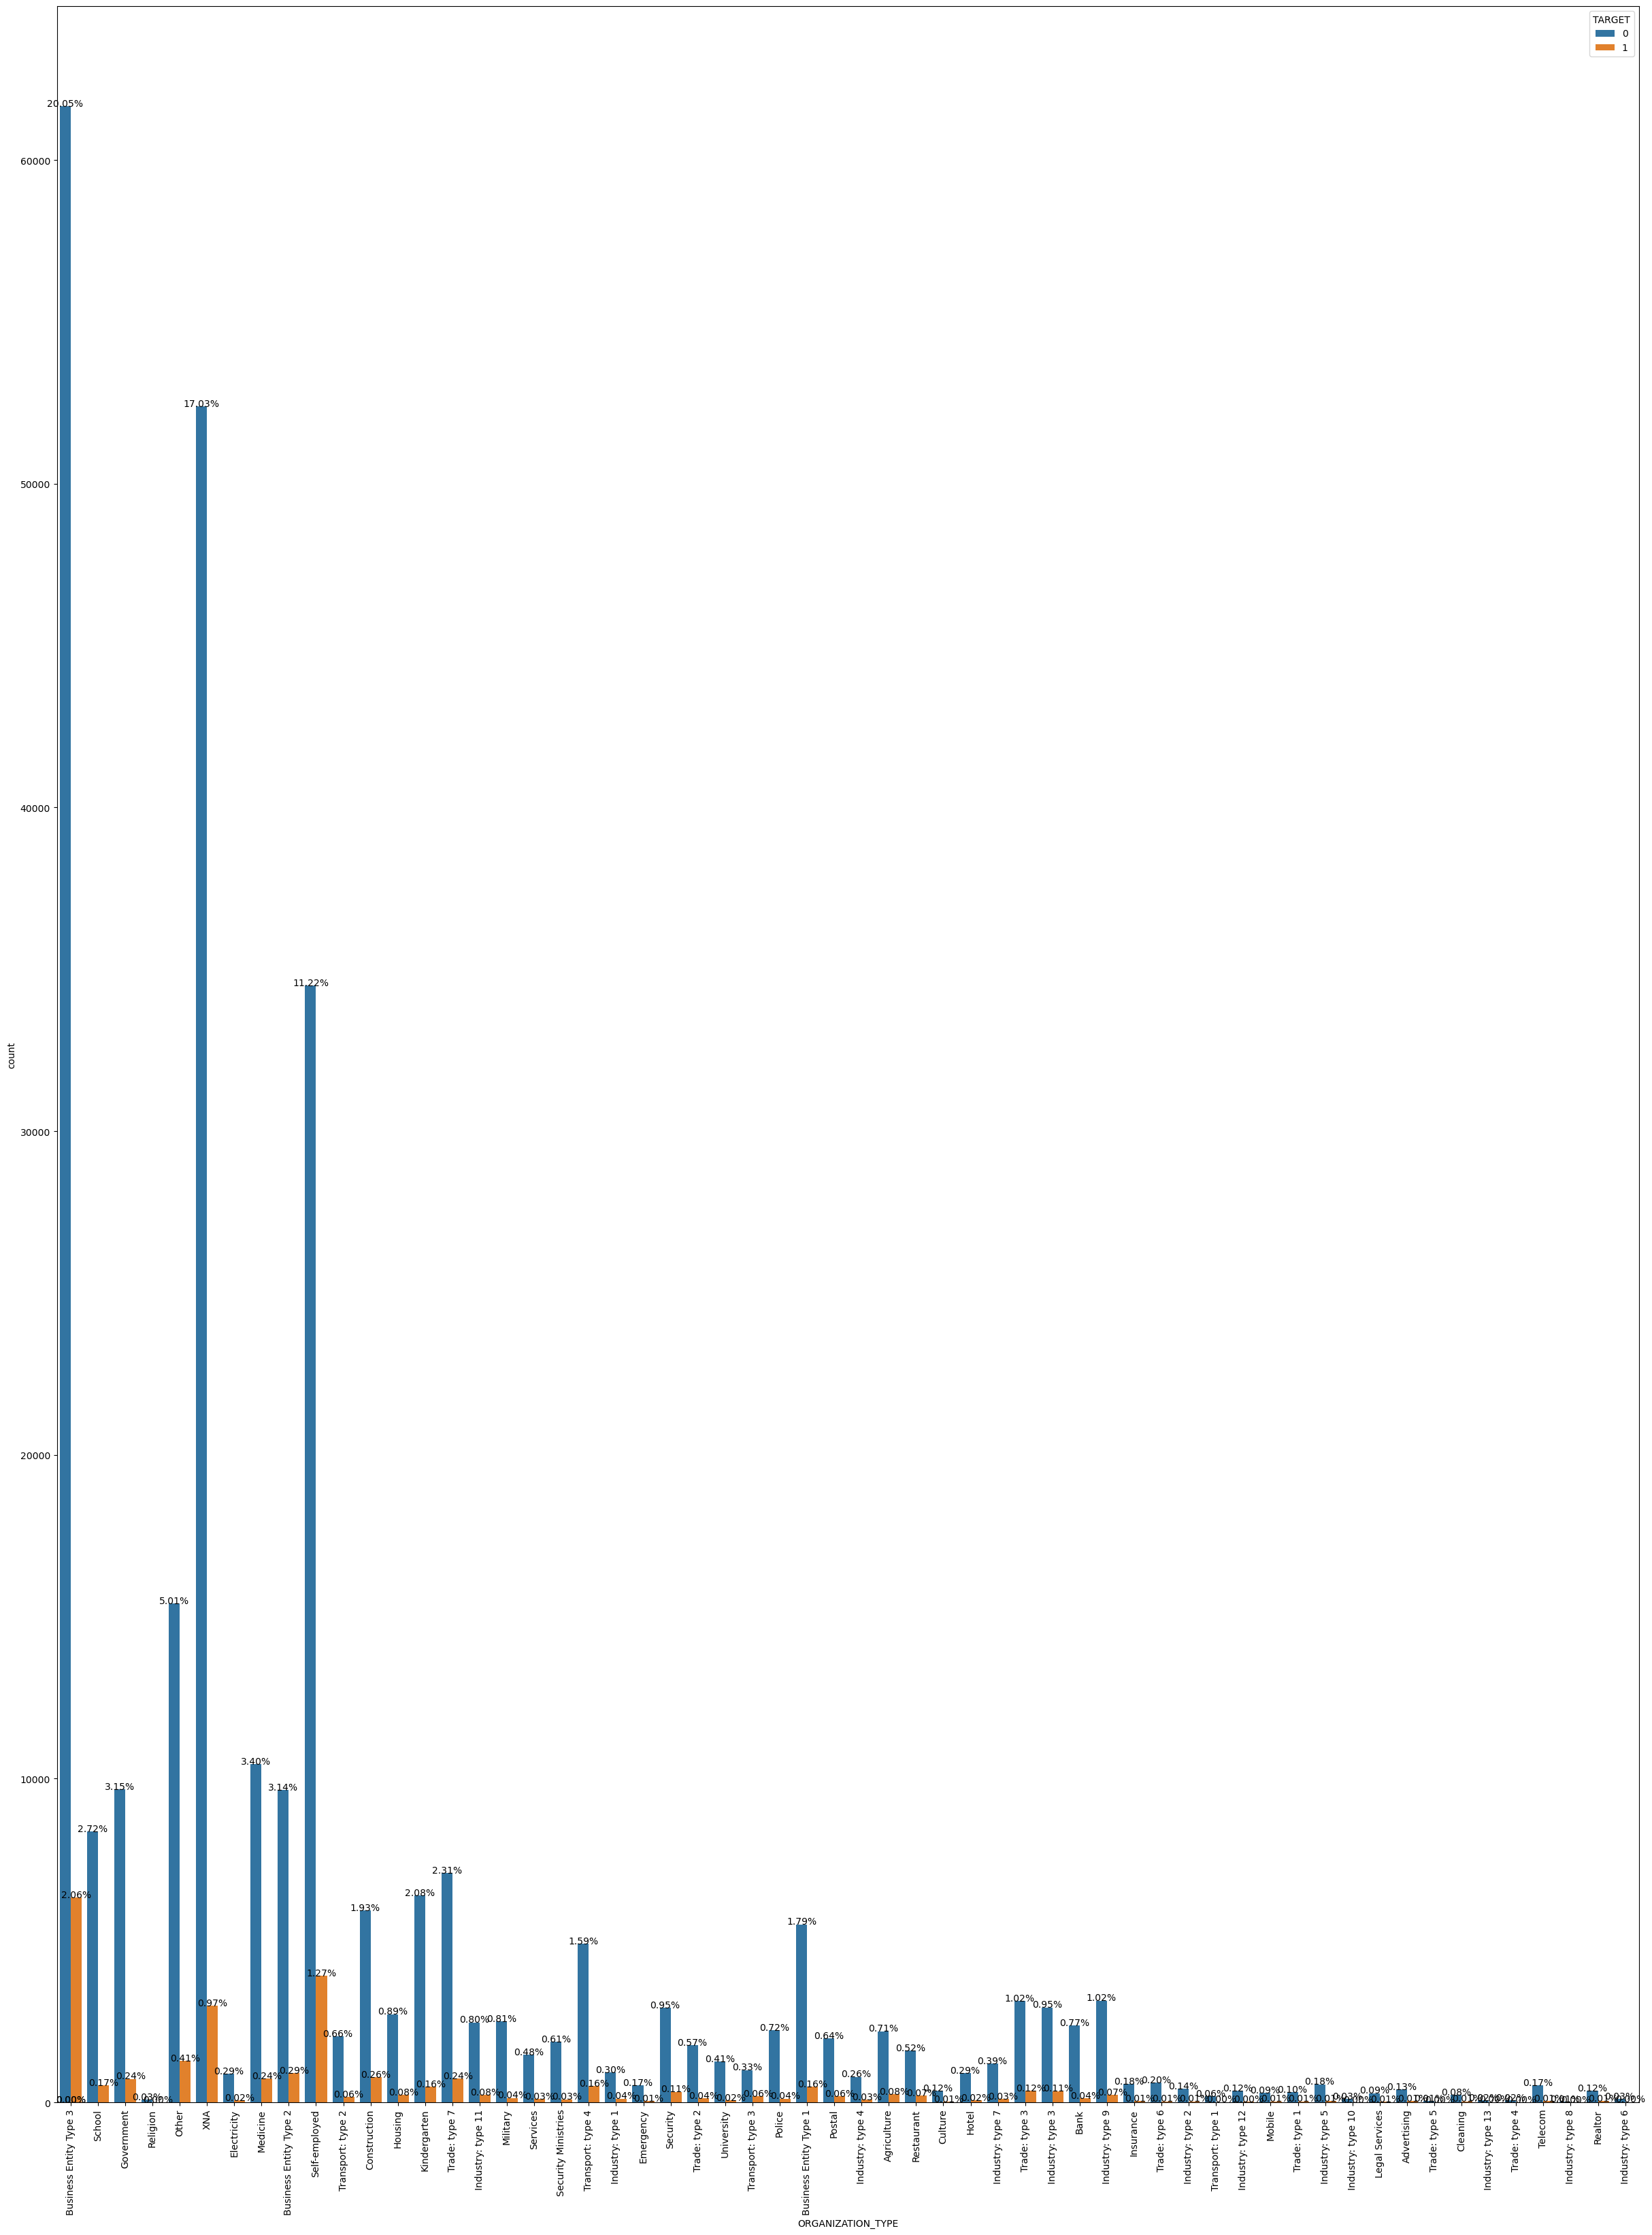

In [188]:
plt.figure(figsize=(30, 40))
ax = sns.countplot(data=App_score_col_removed, x='ORGANIZATION_TYPE', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

In [189]:
App_score_col_removed.groupby(['EMERGENCYSTATE_MODE']).size()

#Normalized information about building where the client lives,
#What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size()



EMERGENCYSTATE_MODE
No     159428
Yes      2328
dtype: int64

In [190]:
plt.figure(figsize=(30, 40))
ax = sns.countplot(data=App_score_col_removed, x='EMERGENCYSTATE_MODE', hue='TARGET')

# Calculate percentages
total = len(App_score_col_removed)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

In [137]:
#addess the numerical data
App_score_col_removed.dtypes.value_counts()

float64    25
int64      15
object     11
dtype: int64

In [138]:
#creata a grouping

numerical_var = App_score_col_removed.select_dtypes(include=['float64','int64']).columns
numerical_cat_var = App_score_col_removed.select_dtypes(include=['float64','int64','category']).columns
len(numerical_var)

40

In [139]:
App_score_col_removed[numerical_var].head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0           -637            -3648.0            -2120              1.0   
1          -1188            -1186.0             -291              2.0   
2           -225            -4260.0            -2531              1.0   
3          -3039            -9833.0            -2437              2.0   
4          -3038            -4311.0            -3458              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       1                        1   

   YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  \
0                       0.9722         0.0833                        0.9722   
1                       0.9851         0.2917                        0.9851   
2                          NaN            NaN                           NaN   
3                          NaN            NaN                           NaN   
4                          NaN            NaN                           NaN   

   FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  \
0          0.0833                        0.9722          0.0833   
1          0.2917                        0.9851          0.2917   
2             NaN                           NaN             NaN   
3             NaN                           NaN             NaN   
4             NaN                           NaN             NaN   

   TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0          0.0149                       2.0                       2.0   
1          0.0714                       1.0                       0.0   
2             NaN                       0.0                       0.0   


In [140]:
#will create a list for defaulters and list of non defaulters 

number_data = App_score_col_removed[numerical_var]
number_data.groupby(['TARGET']).size()

TARGET
0    282686
1     24825
dtype: int64

In [141]:
#calculate percentage
number_data = App_score_col_removed[numerical_var]
number_data.groupby(['TARGET']).size()/number_data.shape[0]*100

TARGET
0    91.927118
1     8.072882
dtype: float64

In [142]:
number_data = App_score_col_removed[numerical_var]
defaulters = number_data[number_data['TARGET']==1]
repayers = number_data[number_data['TARGET']==0]

defaulters.head()


SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0       100002       1             0          202500.0    406597.5   
26      100031       1             0          112500.0    979992.0   
40      100047       1             0          202500.0   1193580.0   
42      100049       1             0          135000.0    288873.0   
81      100096       1             0           81000.0    252000.0   

    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       24700.5         351000.0                    0.018801       -9461   
26      27076.5         702000.0                    0.018029      -18724   
40      35028.0         855000.0                    0.025164      -17482   
42      16258.5         238500.0                    0.007305      -13384   
81      14593.5         252000.0                    0.028663      -24794   

    DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0            -637            -3648.0            -2120              1.0   
26          -2628            -6573.0            -1827              1.0   
40          -1262            -1182.0            -1029              2.0   
42          -3597              -45.0            -4409              2.0   
81         365243            -5391.0            -4199              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                       0                        0   
42                       0                       0                        0   
81                       0                       0                        0   

    YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  \
0                        0.9722         0.0833                        0.9722   
26                       0.9732         0.0417                        0.9732   
40                       0.9960         0.2500                        0.9960   
42                          NaN            NaN                           NaN   
81                          NaN            NaN                           NaN   

    FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  \
0           0.0833                        0.9722          0.0833   
26          0.0417                        0.9732          0.0417   
40          0.2500                        0.9960          0.2500   
42             NaN                           NaN             NaN   
81             NaN                           NaN             NaN   

    TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0           0.0149                       2.0                       2.0   
26          0.0085                      10.0                       1.0   
40          0.146

In [143]:
repayers = number_data[number_data['TARGET']==0]

repayers.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   
5      100008       0             0           99000.0    490495.5   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   
5      27517.5         454500.0                    0.035792      -16941   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
1          -1188            -1186.0             -291              2.0   
2           -225            -4260.0            -2531              1.0   
3          -3039            -9833.0            -2437              2.0   
4          -3038            -4311.0            -3458              1.0   
5          -1588            -4970.0             -477              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   
5                     2                            2                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       1                        1   
5                       0                        0   

   YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  \
1                       0.9851         0.2917                        0.9851   
2                          NaN            NaN                           NaN   
3                          NaN            NaN                           NaN   
4                          NaN            NaN                           NaN   
5                          NaN            NaN                           NaN   

   FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  \
1          0.2917                        0.9851          0.2917   
2             NaN                           NaN             NaN   
3             NaN                           NaN             NaN   
4             NaN                           NaN             NaN   
5             NaN                           NaN             NaN   

   TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1          0.0714                       1.0                       0.0   
2             NaN                       0.0                       0.0   
3             NaN                       2.0                       0.0   


In [155]:
# Calculate correlation matrix for TOP 10 VAR
defaulters_corr = defaulters.corr()

# Unstack the correlation matrix and keep only upper triangle
defaulters_corr_unstck = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape), k=1).astype(bool)).unstack().reset_index()

# Rename columns
defaulters_corr_unstck = defaulters_corr_unstck.rename(columns={'level_0':'var1', 'level_1':'var2', 0:'corr'})

# Take absolute values of correlation
defaulters_corr_unstck['corr'] = abs(defaulters_corr_unstck['corr'])

# Drop NaN values and sort by correlation values in descending order, then take the top 10
top_corr = defaulters_corr_unstck.dropna(subset=['corr']).sort_values(by='corr', ascending=False).head(33)

print(top_corr)

                              var1                          var2      corr
1269      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE  0.998269
1103                FLOORSMAX_MEDI                 FLOORSMAX_AVG  0.997187
1062  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG  0.996124
1105                FLOORSMAX_MEDI                FLOORSMAX_MODE  0.989195
1023                FLOORSMAX_MODE                 FLOORSMAX_AVG  0.986594
244                AMT_GOODS_PRICE                    AMT_CREDIT  0.983103
982   YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG  0.980466
1064  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE  0.978073
573    REGION_RATING_CLIENT_W_CITY          REGION_RATING_CLIENT  0.956637
482                CNT_FAM_MEMBERS                  CNT_CHILDREN  0.885484
1310      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE  0.868994
737    LIVE_REGION_NOT_WORK_REGION    REG_REGION_NOT_WORK_REGION  0.847885
860        LIVE_CITY_NOT_

In [156]:
# Calculate correlation matrix for TOP 10 VAR
repayers_corr = defaulters.corr()

# Unstack the correlation matrix and keep only upper triangle
repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape), k=1).astype(bool)).unstack().reset_index()

# Rename columns
repayers_corr_unstck = repayers_corr_unstck.rename(columns={'level_0':'var1', 'level_1':'var2', 0:'corr'})

# Take absolute values of correlation
repayers_corr_unstck['corr'] = abs(repayers_corr_unstck['corr'])

# Drop NaN values and sort by correlation values in descending order, then take the top 10
top_corr = repayers_corr_unstck.dropna(subset=['corr']).sort_values(by='corr', ascending=False).head(33)

print(top_corr)

                              var1                          var2      corr
1269      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE  0.998269
1103                FLOORSMAX_MEDI                 FLOORSMAX_AVG  0.997187
1062  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG  0.996124
1105                FLOORSMAX_MEDI                FLOORSMAX_MODE  0.989195
1023                FLOORSMAX_MODE                 FLOORSMAX_AVG  0.986594
244                AMT_GOODS_PRICE                    AMT_CREDIT  0.983103
982   YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG  0.980466
1064  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE  0.978073
573    REGION_RATING_CLIENT_W_CITY          REGION_RATING_CLIENT  0.956637
482                CNT_FAM_MEMBERS                  CNT_CHILDREN  0.885484
1310      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE  0.868994
737    LIVE_REGION_NOT_WORK_REGION    REG_REGION_NOT_WORK_REGION  0.847885
860        LIVE_CITY_NOT_

Show a example of match corr AMT_GOODS_PRICE  AMT_CREDIT

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

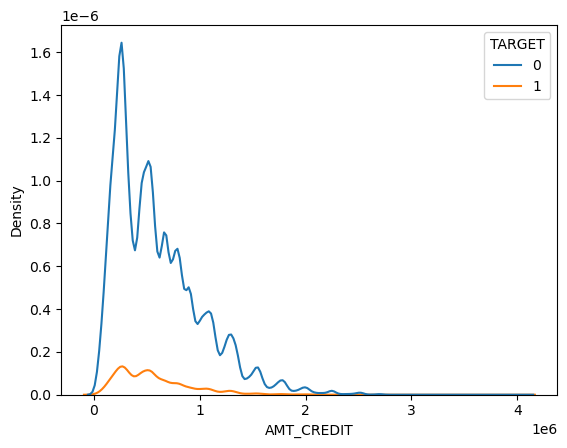

In [146]:
#SHOW HOW THE DEFAULT HAPPENING 'BETWEEN 0-1MIL LIKELY TO DEFAULT'FIR AMT_CREDIT 
sns.kdeplot(data=number_data,x='AMT_CREDIT',hue='TARGET')

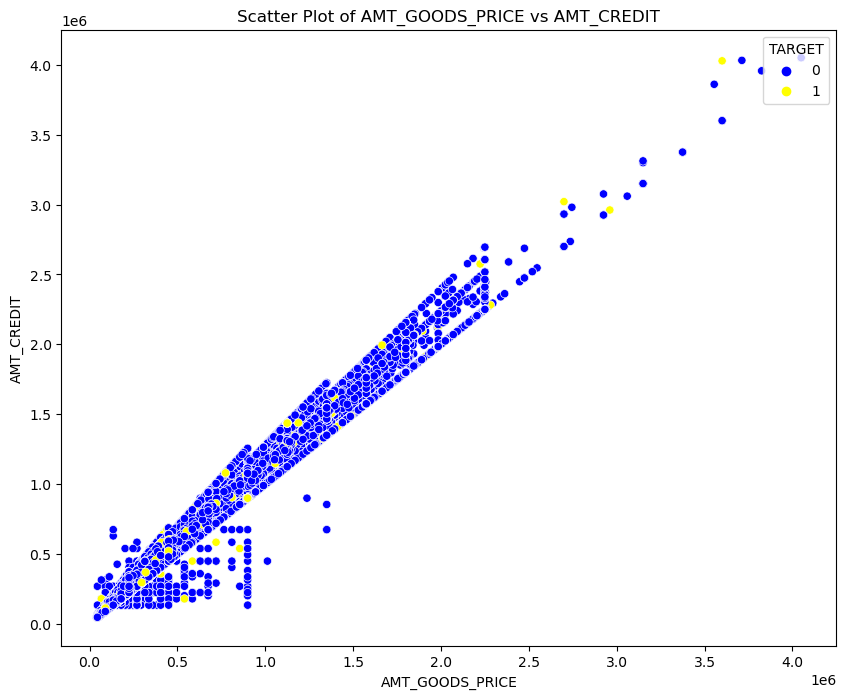

In [147]:
#CORR FOR 193                AMT_GOODS_PRICE                    AMT_CREDIT  0.987365

plt.figure(figsize=(10, 8))
sns.scatterplot(data=number_data, x='AMT_GOODS_PRICE', y='AMT_CREDIT', hue='TARGET', palette={0: 'blue', 1: 'yellow'})
plt.title('Scatter Plot of AMT_GOODS_PRICE vs AMT_CREDIT')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.legend(title='TARGET', loc='upper right')
plt.show()

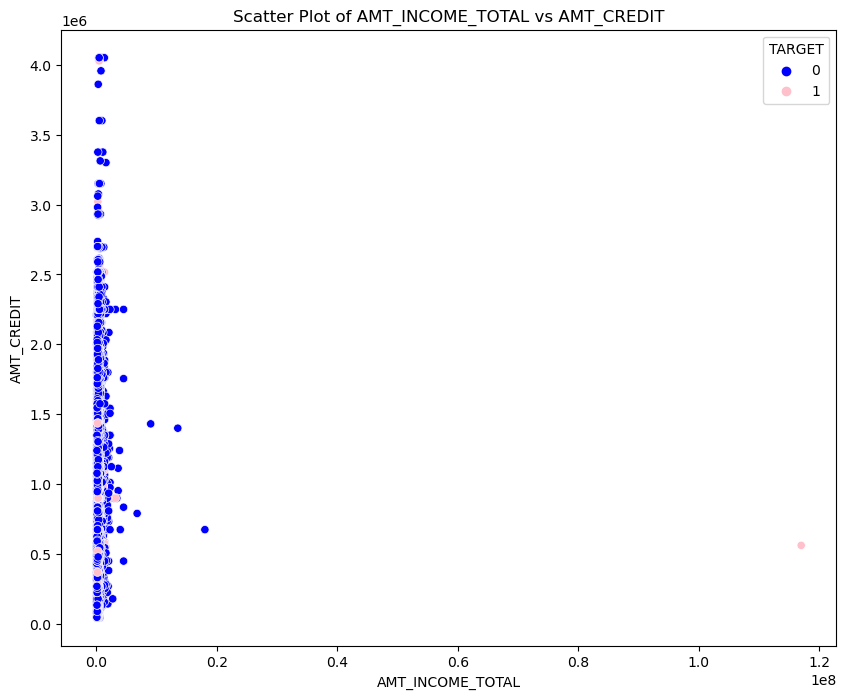

In [148]:
#AMT_INCOME_TOTAL','AMT_CREDIT

plt.figure(figsize=(10, 8))
sns.scatterplot(data=number_data, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', palette={0: 'blue', 1: 'pink'})
plt.title('Scatter Plot of AMT_INCOME_TOTAL vs AMT_CREDIT')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.legend(title='TARGET', loc='upper right')
plt.show()

In [149]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=number_data, x='CNT_CHILDREN', y='AMT_CREDIT', hue='TARGET', palette={0: 'RED', 1: 'yellow'})
plt.title('Scatter Plot of CNT_CHILDREN vs AMT_CREDIT')
plt.xlabel('CNT_CHILDREN')
plt.ylabel('AMT_CREDIT')
plt.legend(title='TARGET', loc='upper right')
plt.show()

In [150]:
amt_var = number_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

In [151]:
sns.pairplot(data=amt_var,hue='TARGET')

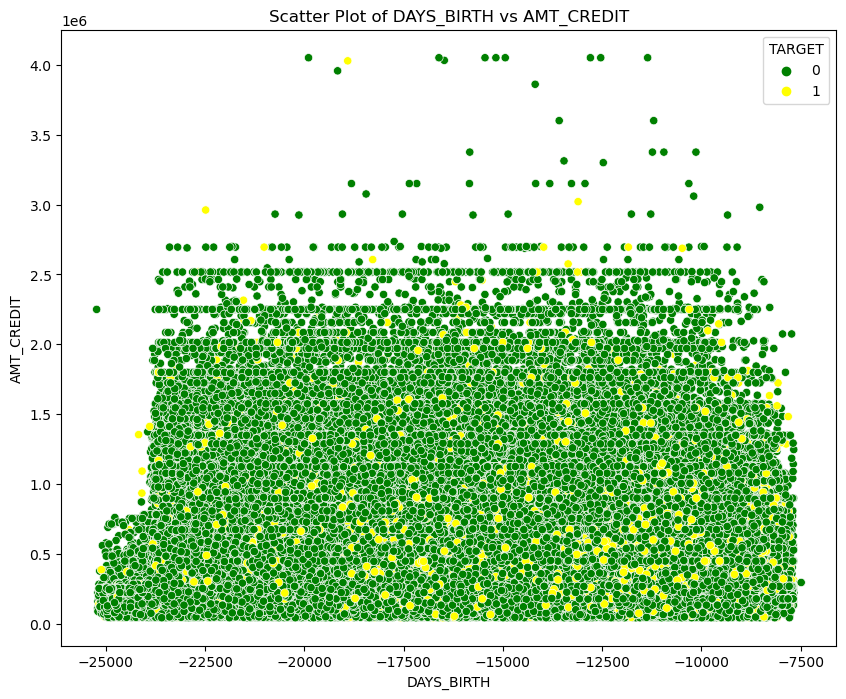

In [171]:
#REVIEW AGE 
plt.figure(figsize=(10, 8))
sns.scatterplot(data=number_data, x='DAYS_BIRTH', y='AMT_CREDIT', hue='TARGET', palette={0: 'green', 1: 'yellow'})
plt.title('Scatter Plot of DAYS_BIRTH vs AMT_CREDIT')
plt.xlabel('DAYS_BIRTH')
plt.ylabel('AMT_CREDIT')
plt.legend(title='TARGET', loc='upper right')
plt.show()


In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [184]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming App_score_col_removed DataFrame is already defined

# Selecting numeric columns for X
numeric_columns = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']
X = App_score_col_removed[numeric_columns]

# Selecting the target column
y = App_score_col_removed['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features (recommended for Lasso Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create and train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed for regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients
coefficients = pd.Series(lasso_model.coef_, index=X.columns)
print("\nCoefficients:")
print(coefficients)

Mean Squared Error: 0.07399268828617375

Coefficients:
AMT_CREDIT         -0.0
AMT_GOODS_PRICE    -0.0
AMT_INCOME_TOTAL   -0.0
dtype: float64


In [186]:
from sklearn.ensemble import AdaBoostRegressor

# Assuming App_score_col_removed DataFrame is already defined
# Selecting numeric columns for X
numeric_columns = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']
X = App_score_col_removed[numeric_columns]

# Selecting the target column
y = App_score_col_removed['TARGET']

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for AdaBoostRegressor)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the AdaBoostRegressor model
ada_boost_model = AdaBoostRegressor(n_estimators=50, random_state=42)  
ada_boost_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ada_boost_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.07357874715094635


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming App_score_col_removed DataFrame is already defined
# Selecting numeric columns for X
numeric_columns = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']
X = App_score_col_removed[numeric_columns]

# Selecting the target column
y = App_score_col_removed['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=50)

# Preprocessing pipeline: Impute missing values and standardize features
preprocessor = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)
# Transform the testing data
X_test_scaled = preprocessor.transform(X_test)

# Train the GBM model
n_estimators = 100  # Number of boosting stages to be run
gbm = GradientBoostingClassifier(n_estimators=n_estimators, random_state=50)
gbm.fit(X_train_scaled, y_train)

# Make predictions
train_pred = gbm.predict(X_train_scaled)
test_pred = gbm.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Plotting the training and testing accuracies as a function of the number of boosting stages
train_scores = [accuracy_score(y_train, y_pred) for y_pred in gbm.staged_predict(X_train_scaled)]
test_scores = [accuracy_score(y_test, y_pred) for y_pred in gbm.staged_predict(X_test_scaled)]

Training Accuracy: 0.9192076861095755
Testing Accuracy: 0.9200377211238293


In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Assuming App_score_col_removed DataFrame is already defined

# Selecting numeric columns for X
numeric_columns = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']
X = App_score_col_removed[numeric_columns]

# Selecting the target column
y = App_score_col_removed['TARGET']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.07375419334456239


The highest testing accuracy achieved is 0.9200 using the GradientBoostingClassifier model. This accuracy represents the effectiveness of the model in predicting loan approval, which is a crucial factor in the decision-making process. Additionally, other data points and features contribute to a collaborative decision-making process that satisfies both the client and stakeholders, ensuring a comprehensive and informed approach to loan approval.

In [225]:
numeric_columns = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']

# Select the data from the DataFrame
data = App_score_col_removed[numeric_columns + ['TARGET']]

# Create a pair plot with pink color palette
sns.pairplot(data, hue='TARGET', palette='pink')

# Display the plot
plt.show()
